In [1]:
# import packages/libraries 
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report


from sklearn.model_selection import KFold
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [2]:
# import data
df = pd.read_csv("C:\Data science\ExcelR Project\\Churn.csv")
df.head()

,Unnamed: 0,state,area.code,account.length,voice.plan,voice.messages,intl.plan,intl.mins,intl.calls,intl.charge,...,day.calls,day.charge,eve.mins,eve.calls,eve.charge,night.mins,night.calls,night.charge,customer.calls,churn
0,1,KS,area_code_415,128,yes,25,no,10.0,3,2.70,...,110,45.07,197.4,99,16.78,244.7,91,11.01,1,no
1,2,OH,area_code_415,107,yes,26,no,13.7,3,3.70,...,123,27.47,195.5,103,16.62,254.4,103,11.45,1,no
2,3,NJ,area_code_415,137,no,0,no,12.2,5,3.29,...,114,41.38,121.2,110,10.30,162.6,104,7.32,0,no
3,4,OH,area_code_408,84,no,0,yes,6.6,7,1.78,...,71,50.9,61.9,88,5.26,196.9,89,8.86,2,no
4,5,OK,area_code_415,75,no,0,yes,10.1,3,2.73,...,113,28.34,148.3,122,12.61,186.9,121,8.41,3,no


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      5000 non-null   int64  
 1   state           5000 non-null   object 
 2   area.code       5000 non-null   object 
 3   account.length  5000 non-null   int64  
 4   voice.plan      5000 non-null   object 
 5   voice.messages  5000 non-null   int64  
 6   intl.plan       5000 non-null   object 
 7   intl.mins       5000 non-null   float64
 8   intl.calls      5000 non-null   int64  
 9   intl.charge     5000 non-null   float64
 10  day.mins        5000 non-null   float64
 11  day.calls       5000 non-null   int64  
 12  day.charge      5000 non-null   object 
 13  eve.mins        5000 non-null   object 
 14  eve.calls       5000 non-null   int64  
 15  eve.charge      5000 non-null   float64
 16  night.mins      5000 non-null   float64
 17  night.calls     5000 non-null   i

In [4]:
# Drop unnamed column
df = df.drop(columns=['Unnamed: 0'])

In [5]:
# Rename columns
df = df.rename({'area.code':'area_code','account.length':'account_length','voice.plan':'voice_plan',
                  'voice.messages':'voice_messages','intl.plan':'intl_plan','intl.mins':'intl_mins','intl.calls':'intl_calls',
                  'intl.charge':'intl_charge','day.mins':'day_mins','day.calls':'day_calls',
                  'day.charge':'day_charge','eve.mins':'eve_mins','eve.calls':'eve_calls',
                  'eve.charge':'eve_charge','night.mins':'night_mins','night.calls':'night_calls',
                  'night.charge':'night_charge','customer.calls':'customer_calls'}, axis= 1)

In [6]:
# No. of unique values in each column
df.nunique()

state               51
area_code            3
account_length     218
voice_plan           2
voice_messages      48
intl_plan            2
intl_mins          170
intl_calls          21
intl_charge        170
day_mins          1961
day_calls          123
day_charge        1962
eve_mins          1877
eve_calls          126
eve_charge        1659
night_mins        1853
night_calls        131
night_charge      1028
customer_calls      10
churn                2
dtype: int64

In [7]:
# To find duplicate rows
df.duplicated().sum()

0

In [8]:
# To find null values
df.isna().sum()

state             0
area_code         0
account_length    0
voice_plan        0
voice_messages    0
intl_plan         0
intl_mins         0
intl_calls        0
intl_charge       0
day_mins          0
day_calls         0
day_charge        0
eve_mins          0
eve_calls         0
eve_charge        0
night_mins        0
night_calls       0
night_charge      0
customer_calls    0
churn             0
dtype: int64

In [9]:
# Statistics for numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,5000.0,100.258600,39.694560,1.0,73.00,100.00,127.00,243.00
voice_messages,5000.0,7.755200,13.546393,0.0,0.00,0.00,17.00,52.00
intl_mins,5000.0,10.261780,2.761396,0.0,8.50,10.30,12.00,20.00
intl_calls,5000.0,4.435200,2.456788,0.0,3.00,4.00,6.00,20.00
intl_charge,5000.0,2.771196,0.745514,0.0,2.30,2.78,3.24,5.40
day_mins,5000.0,180.288900,53.894699,0.0,143.70,180.10,216.20,351.50
day_calls,5000.0,100.029400,19.831197,0.0,87.00,100.00,113.00,165.00
eve_calls,5000.0,100.191000,19.826496,0.0,87.00,100.00,114.00,170.00
eve_charge,5000.0,17.054322,4.296843,0.0,14.14,17.09,19.90,30.91
night_mins,5000.0,200.391620,50.527789,0.0,166.90,200.40,234.70,395.00


In [10]:
# Convert Object columns to float,replace Nan with mean (Imputation)
df['day_charge'] = pd.to_numeric(df['day_charge'], 'coerce').pipe(lambda s: s.fillna(s.mean()))
df['eve_mins'] = pd.to_numeric(df['eve_mins'], 'coerce').pipe(lambda s: s.fillna(s.mean()))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           5000 non-null   object 
 1   area_code       5000 non-null   object 
 2   account_length  5000 non-null   int64  
 3   voice_plan      5000 non-null   object 
 4   voice_messages  5000 non-null   int64  
 5   intl_plan       5000 non-null   object 
 6   intl_mins       5000 non-null   float64
 7   intl_calls      5000 non-null   int64  
 8   intl_charge     5000 non-null   float64
 9   day_mins        5000 non-null   float64
 10  day_calls       5000 non-null   int64  
 11  day_charge      5000 non-null   float64
 12  eve_mins        5000 non-null   float64
 13  eve_calls       5000 non-null   int64  
 14  eve_charge      5000 non-null   float64
 15  night_mins      5000 non-null   float64
 16  night_calls     5000 non-null   int64  
 17  night_charge    5000 non-null   f

In [12]:
# Statistics for numerical columns
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
account_length,5000.0,100.258600,39.694560,1.0,73.00,100.000,127.00,243.00
voice_messages,5000.0,7.755200,13.546393,0.0,0.00,0.000,17.00,52.00
intl_mins,5000.0,10.261780,2.761396,0.0,8.50,10.300,12.00,20.00
intl_calls,5000.0,4.435200,2.456788,0.0,3.00,4.000,6.00,20.00
intl_charge,5000.0,2.771196,0.745514,0.0,2.30,2.780,3.24,5.40
day_mins,5000.0,180.288900,53.894699,0.0,143.70,180.100,216.20,351.50
day_calls,5000.0,100.029400,19.831197,0.0,87.00,100.000,113.00,165.00
day_charge,5000.0,30.653501,9.159936,0.0,24.43,30.625,36.75,59.76
eve_mins,5000.0,200.580326,50.433135,0.0,166.60,200.800,233.90,363.70
eve_calls,5000.0,100.191000,19.826496,0.0,87.00,100.000,114.00,170.00


In [13]:
# Statistics for categorical variables
df.describe(include=["object"]).transpose()

,count,unique,top,freq
state,5000,51,WV,158
area_code,5000,3,area_code_415,2495
voice_plan,5000,2,no,3677
intl_plan,5000,2,no,4527
churn,5000,2,no,4293


In [14]:
# Correlation
df.corr()

,account_length,voice_messages,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls
account_length,1.000000,-0.014575,0.001291,0.014277,0.001292,-0.001017,0.028240,-0.000799,-0.008688,0.009143,-0.009587,0.000668,-0.007825,0.000656,-0.001445
voice_messages,-0.014575,1.000000,0.002463,0.000124,0.002505,0.005381,0.000883,0.005138,0.018862,-0.003954,0.019496,0.005541,0.002676,0.005535,-0.007086
intl_mins,0.001291,0.002463,1.000000,0.016791,0.999993,-0.019486,0.013097,-0.019281,-0.000346,-0.007458,0.000132,-0.006721,0.000391,-0.006717,-0.012122
intl_calls,0.014277,0.000124,0.016791,1.000000,0.016900,-0.001303,0.010893,-0.001599,0.007987,0.005574,0.008393,-0.017214,-0.000156,-0.017182,-0.019147
intl_charge,0.001292,0.002505,0.999993,0.016900,1.000000,-0.019415,0.013161,-0.019211,-0.000323,-0.007507,0.000155,-0.006655,0.000368,-0.006650,-0.012180
day_mins,-0.001017,0.005381,-0.019486,-0.001303,-0.019415,1.000000,0.001935,0.999767,-0.010907,0.008128,-0.010760,0.011799,0.004236,0.011783,0.002733
day_calls,0.028240,0.000883,0.013097,0.010893,0.013161,0.001935,1.000000,0.001665,-0.001724,0.003754,-0.000695,0.002804,-0.008308,0.002802,-0.010739
day_charge,-0.000799,0.005138,-0.019281,-0.001599,-0.019211,0.999767,0.001665,1.000000,-0.011534,0.007982,-0.011386,0.011315,0.004206,0.011299,0.002929
eve_mins,-0.008688,0.018862,-0.000346,0.007987,-0.000323,-0.010907,-0.001724,-0.011534,1.000000,0.003110,0.997662,-0.016501,0.015590,-0.016503,-0.012394
eve_calls,0.009143,-0.003954,-0.007458,0.005574,-0.007507,0.008128,0.003754,0.007982,0.003110,1.000000,0.002778,0.001781,-0.013682,0.001799,0.006235


<function matplotlib.pyplot.show(close=None, block=None)>

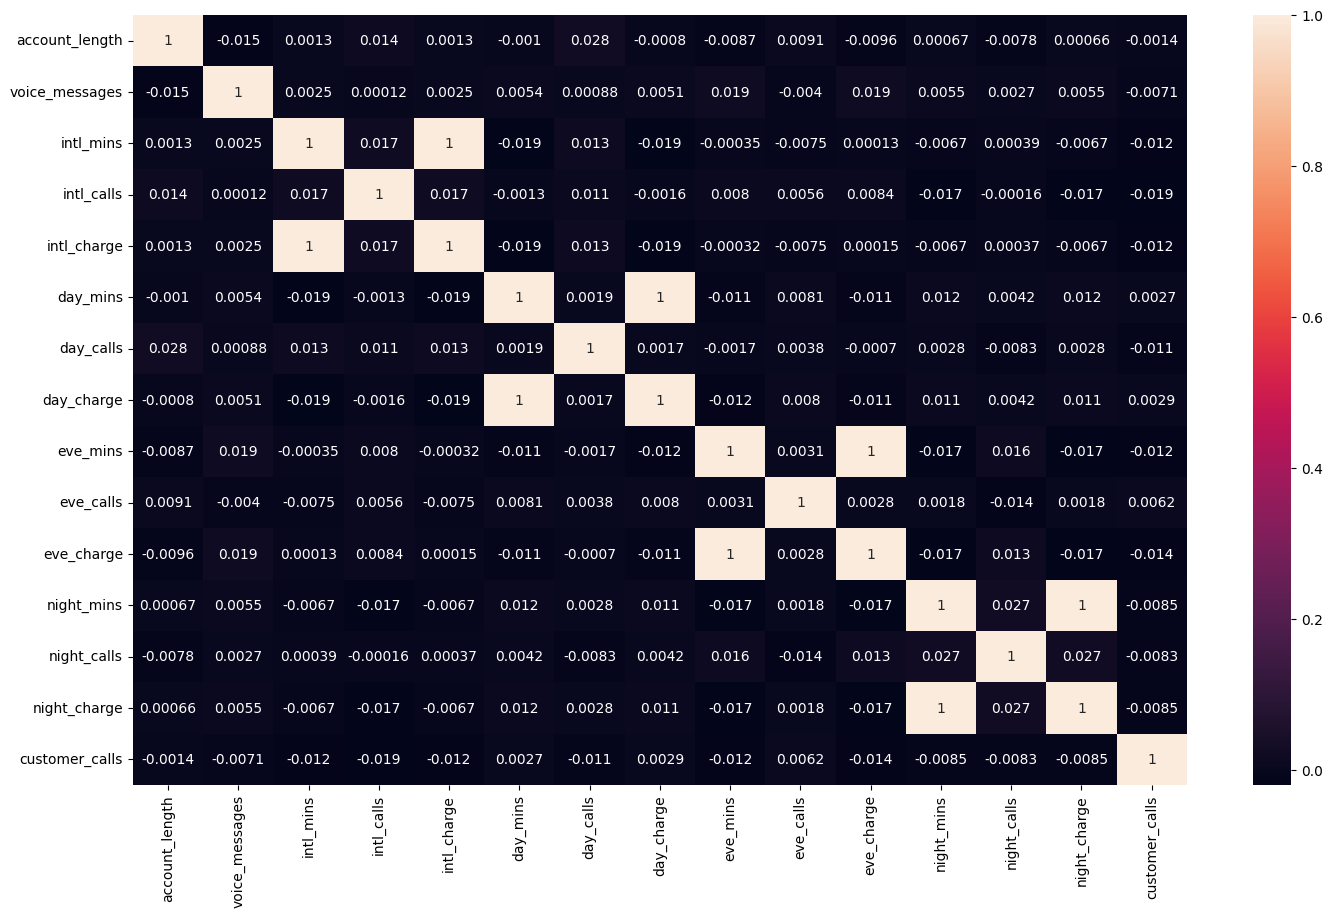

In [15]:
# Heatmap of correlation
plt.subplots(figsize=(17,10))
sns.heatmap(df.corr(), annot=True)
plt.show

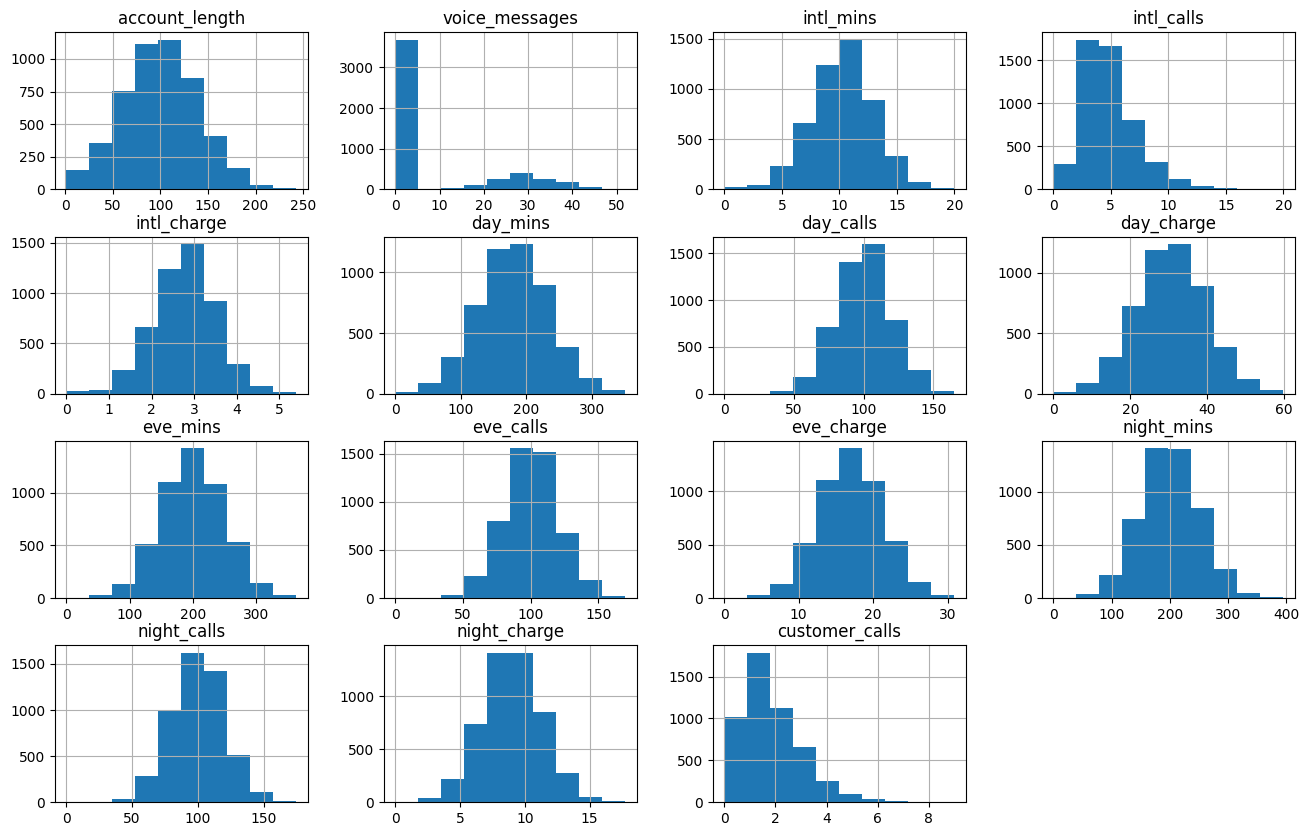

In [16]:
histograms = df.hist(figsize=(16,10))

In [17]:
# Skewness
df.skew()

account_length    0.109291
voice_messages    1.350493
intl_mins        -0.209966
intl_calls        1.360692
intl_charge      -0.210286
day_mins         -0.011731
day_calls        -0.084891
day_charge       -0.012604
eve_mins         -0.012743
eve_calls        -0.020175
eve_charge       -0.010990
night_mins        0.019325
night_calls       0.002133
night_charge      0.019287
customer_calls    1.042462
dtype: float64

In [18]:
# Kurtosis
df.kurt()

account_length   -0.101621
voice_messages    0.199127
intl_mins         0.655317
intl_calls        3.268184
intl_charge       0.655989
day_mins         -0.021294
day_calls         0.178568
day_charge       -0.018714
eve_mins          0.066450
eve_calls         0.117363
eve_charge        0.051289
night_mins        0.082359
night_calls       0.144438
night_charge      0.082378
customer_calls    1.481096
dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'account_length'),
  Text(1, 0, 'voice_messages'),
  Text(2, 0, 'intl_mins'),
  Text(3, 0, 'intl_calls'),
  Text(4, 0, 'intl_charge'),
  Text(5, 0, 'day_mins'),
  Text(6, 0, 'day_calls'),
  Text(7, 0, 'day_charge'),
  Text(8, 0, 'eve_mins'),
  Text(9, 0, 'eve_calls'),
  Text(10, 0, 'eve_charge'),
  Text(11, 0, 'night_mins'),
  Text(12, 0, 'night_calls'),
  Text(13, 0, 'night_charge'),
  Text(14, 0, 'customer_calls')])

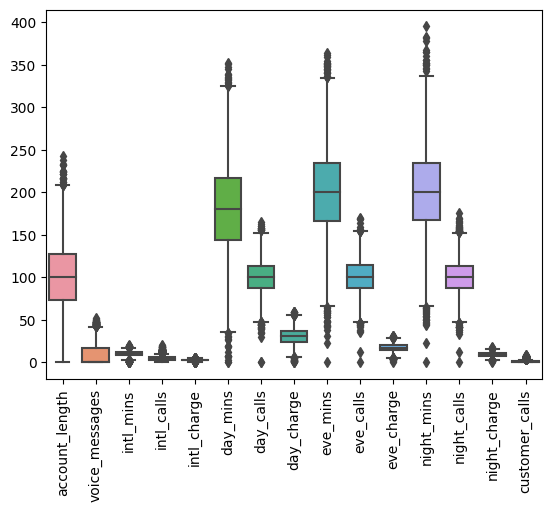

In [19]:
# Boxplots
sns.boxplot(data=df)
plt.xticks(rotation='vertical')

In [20]:
# Exploratory Data Analysis
# Categorical variables
# State
state = df.state.value_counts(normalize=True).round(4)*100
state

WV    3.16
MN    2.50
AL    2.48
ID    2.38
VA    2.36
OH    2.32
TX    2.32
WY    2.30
NY    2.28
OR    2.28
NJ    2.24
UT    2.24
WI    2.12
MI    2.06
ME    2.06
MA    2.06
MD    2.04
VT    2.02
MT    1.98
RI    1.98
KY    1.98
MS    1.98
CT    1.98
KS    1.98
WA    1.96
IN    1.96
CO    1.92
NH    1.90
DE    1.88
MO    1.86
AR    1.84
NM    1.82
NC    1.82
SC    1.82
FL    1.80
NV    1.80
OK    1.80
TN    1.78
AZ    1.78
DC    1.76
IL    1.76
NE    1.76
ND    1.76
HI    1.72
SD    1.70
GA    1.66
LA    1.64
PA    1.54
AK    1.44
IA    1.38
CA    1.04
Name: state, dtype: float64

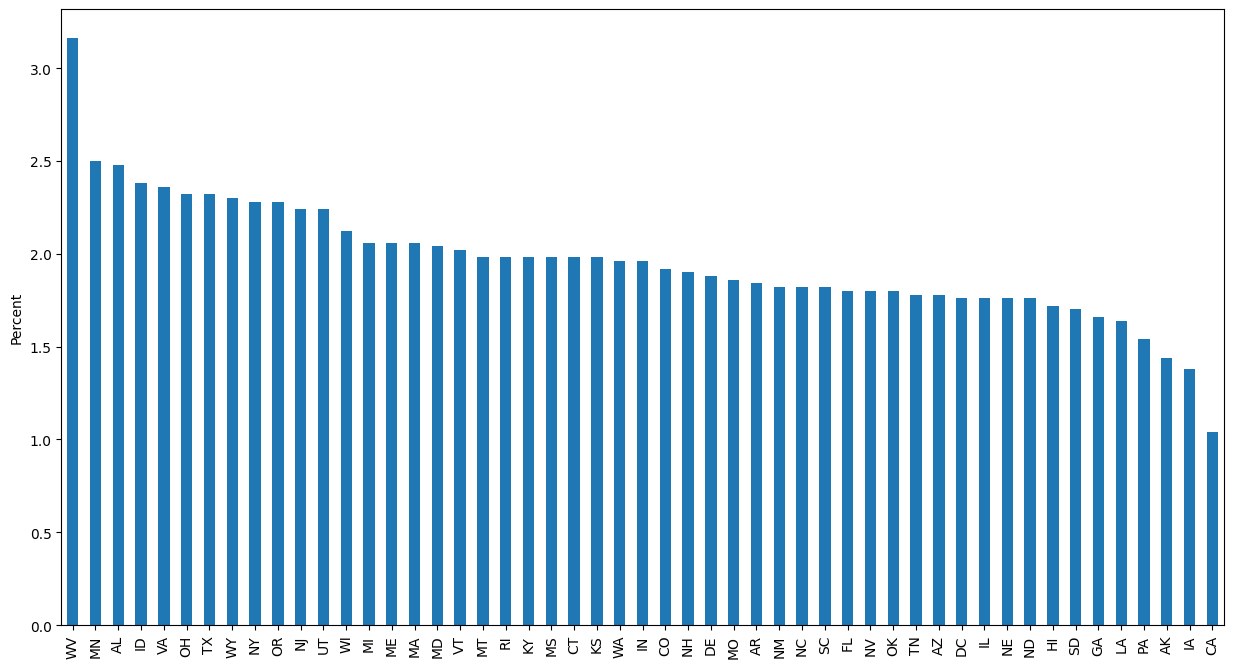

In [21]:
state.plot.bar(figsize=(15,8))
plt.ylabel("Percent")
plt.show()

<AxesSubplot: xlabel='state'>

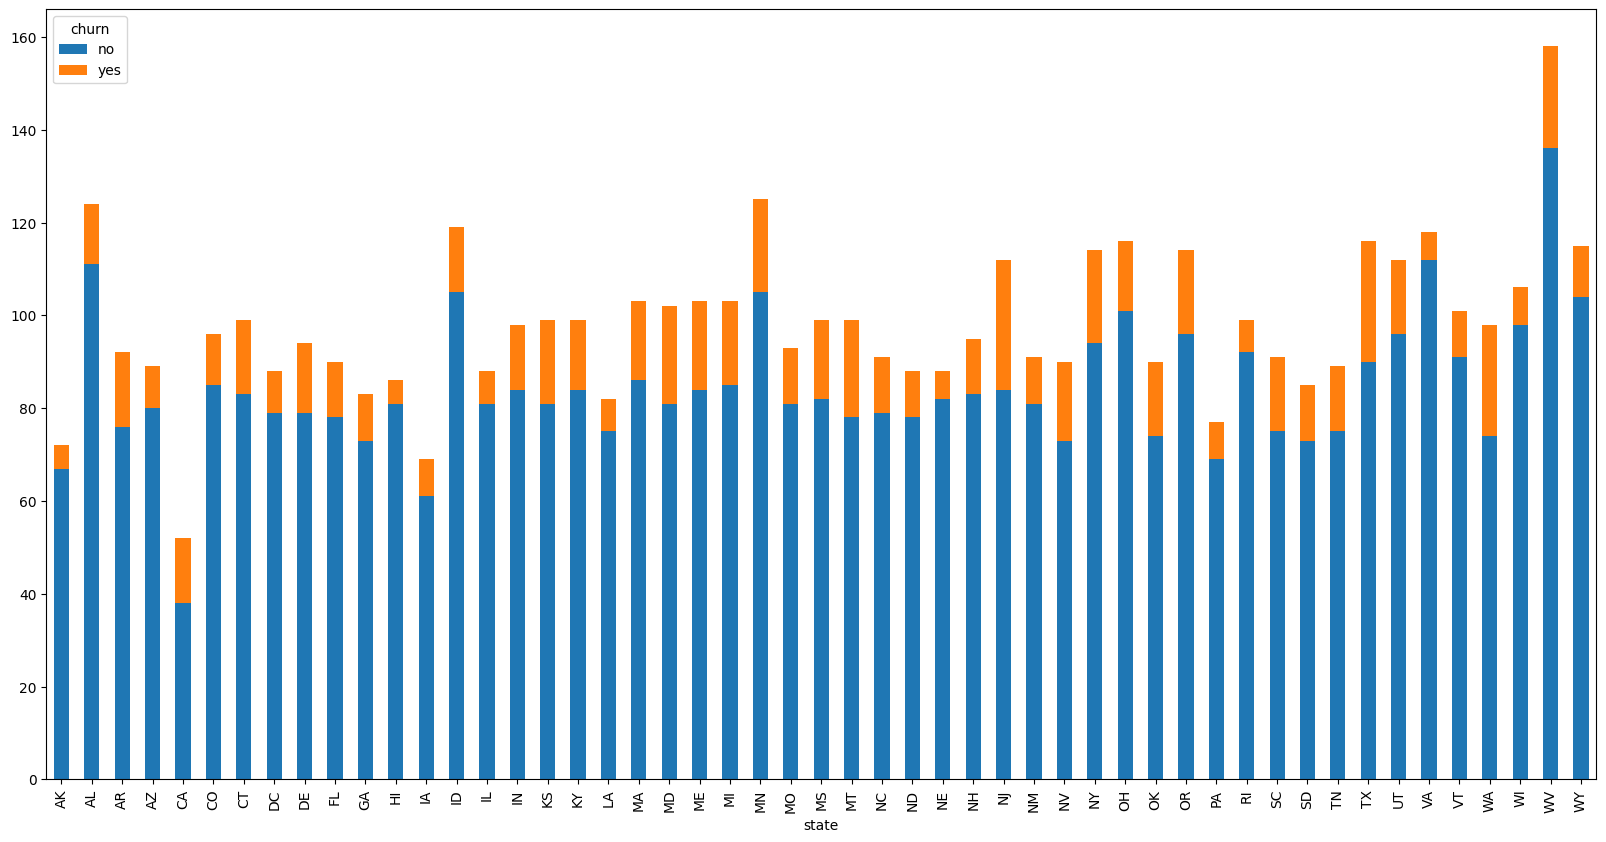

In [22]:
# Group plot state vs churn
df.groupby(["state", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(20,10)) 

In [23]:
# state vs intl_plan
crosstab_state_intl = pd.crosstab(df.state, df.intl_plan, normalize='index').round(4)*100
crosstab_state_intl

intl_plan,no,yes
state,,
AK,91.67,8.33
AL,92.74,7.26
AR,89.13,10.87
AZ,93.26,6.74
CA,90.38,9.62
CO,90.62,9.38
CT,89.90,10.10
DC,88.64,11.36
DE,87.23,12.77


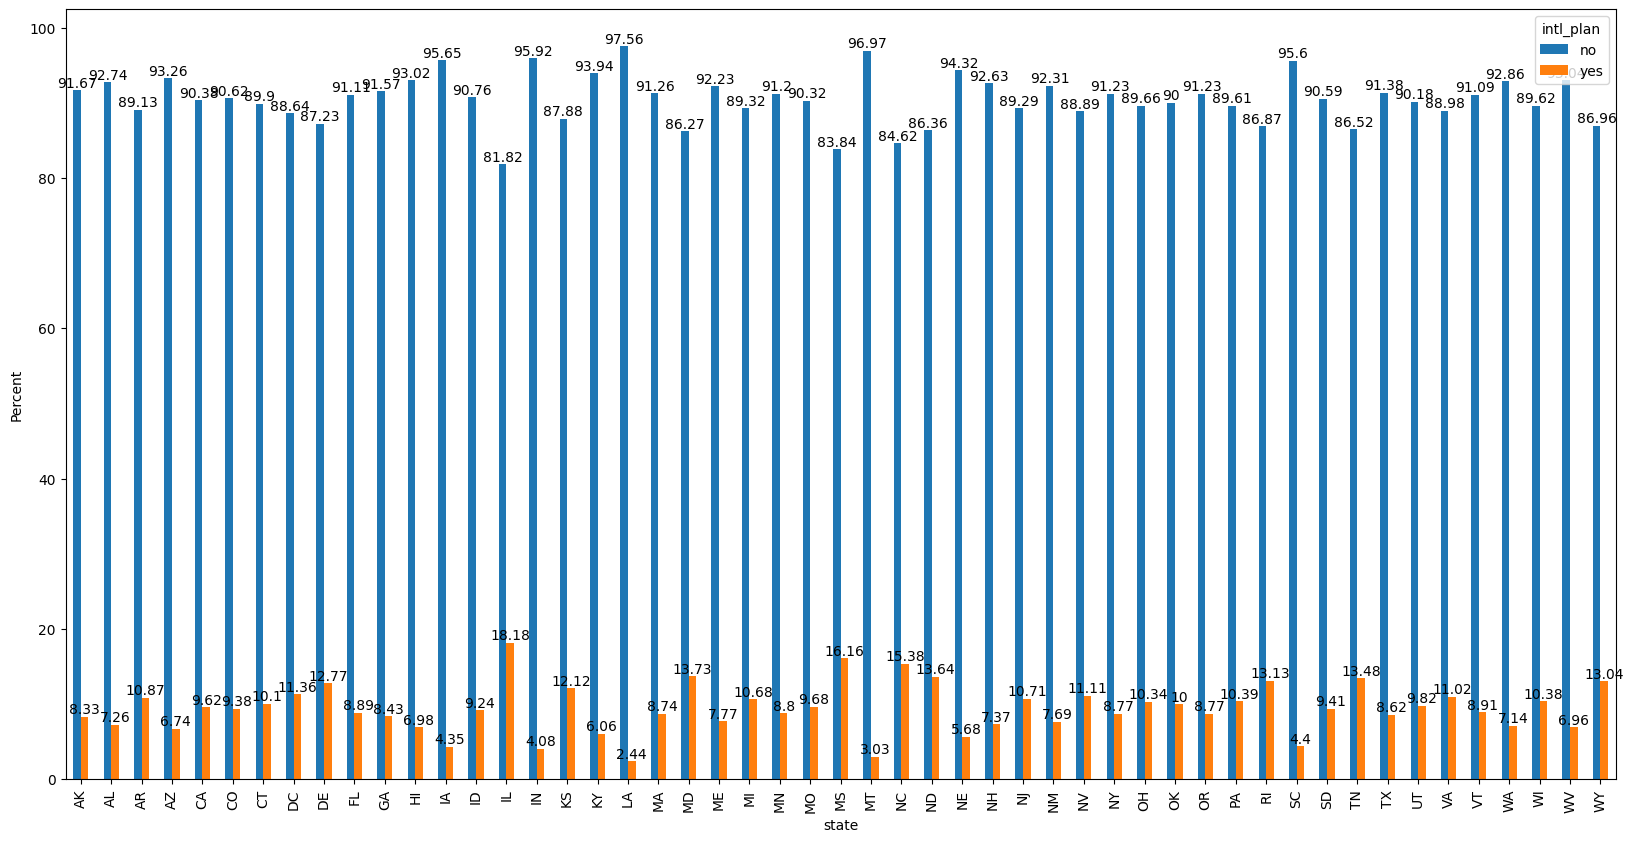

In [24]:
# state vs intl_plan
ax = crosstab_state_intl.plot.bar(figsize=(20,10))
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Percent")
plt.show()

In [25]:
# state vs voice_plan
crosstab_state_voice = pd.crosstab(df.state, df.voice_plan, normalize='index').round(4)*100
crosstab_state_voice

voice_plan,no,yes
state,,
AK,69.44,30.56
AL,75.81,24.19
AR,65.22,34.78
AZ,66.29,33.71
CA,76.92,23.08
CO,71.88,28.12
CT,70.71,29.29
DC,65.91,34.09
DE,73.40,26.60


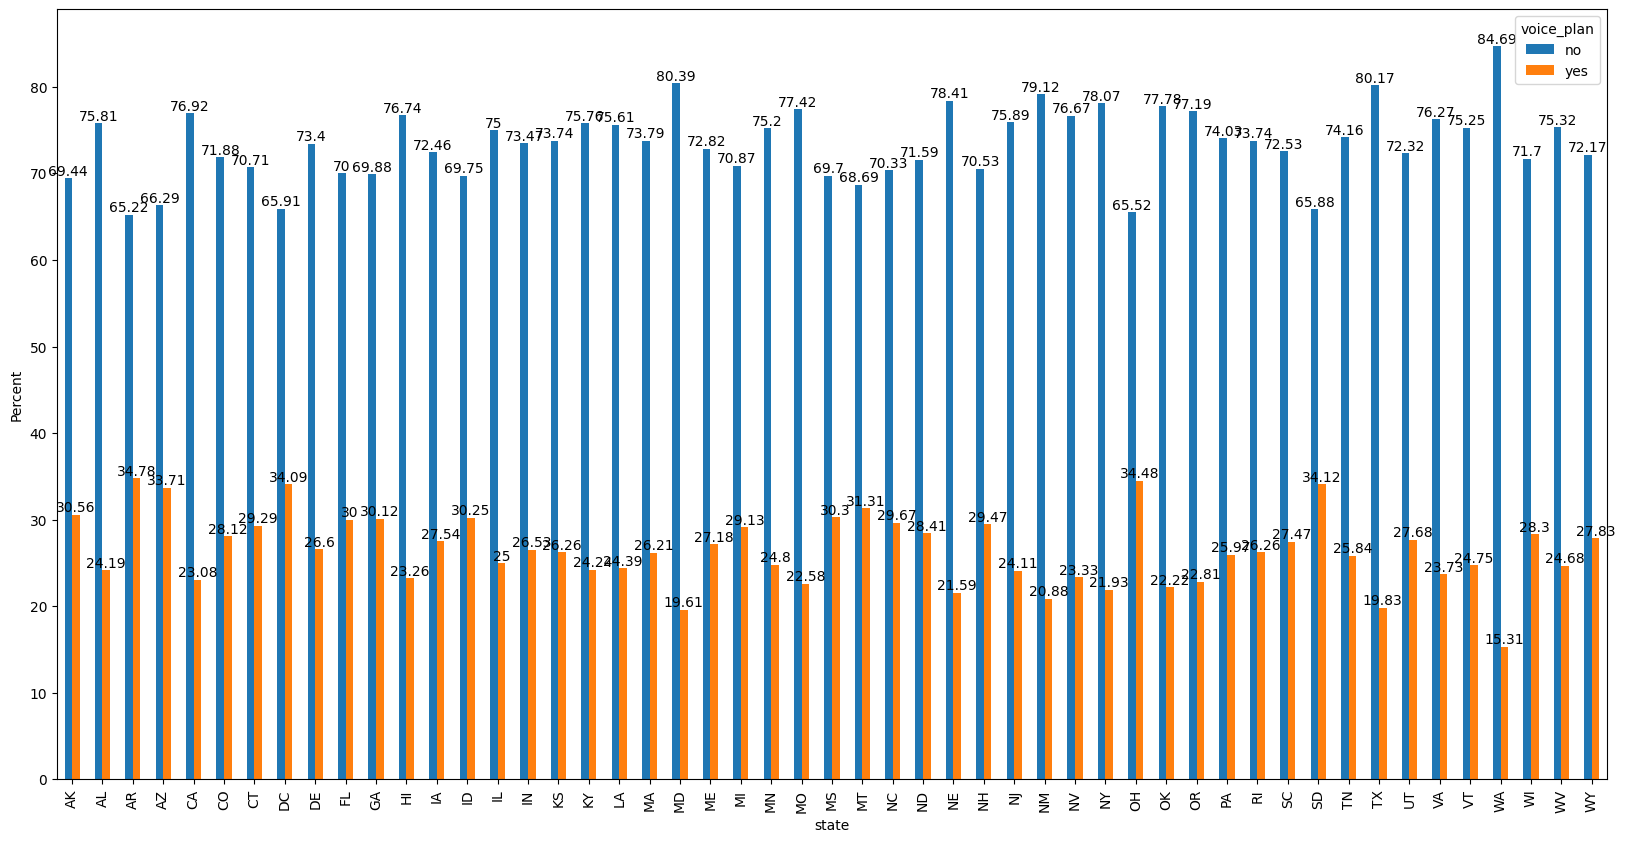

In [26]:
# state vs voice_plan
ax = crosstab_state_voice.plot.bar(figsize=(20,10))
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Percent")
plt.show()

In [27]:
# Area code realtionship with churn
crosstab_area = pd.crosstab(df.area_code, df.churn, normalize='index').round(4)*100
crosstab_area

churn,no,yes
area_code,,
area_code_408,85.94,14.06
area_code_415,86.13,13.87
area_code_510,85.23,14.77


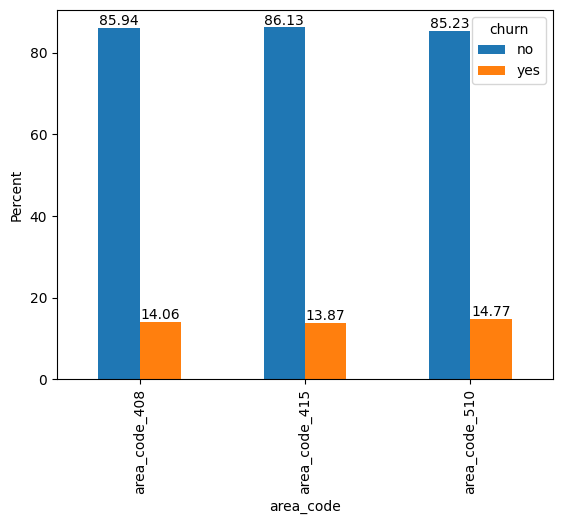

In [28]:
# Area code vs churn
ax = crosstab_area.plot.bar()
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Percent")
plt.show()

In [29]:
# area code vs intl_plan
crosstab_area_intl = pd.crosstab(df.area_code, df.intl_plan, normalize='index').round(4)*100
crosstab_area_intl

intl_plan,no,yes
area_code,,
area_code_408,91.34,8.66
area_code_415,90.94,9.06
area_code_510,88.92,11.08


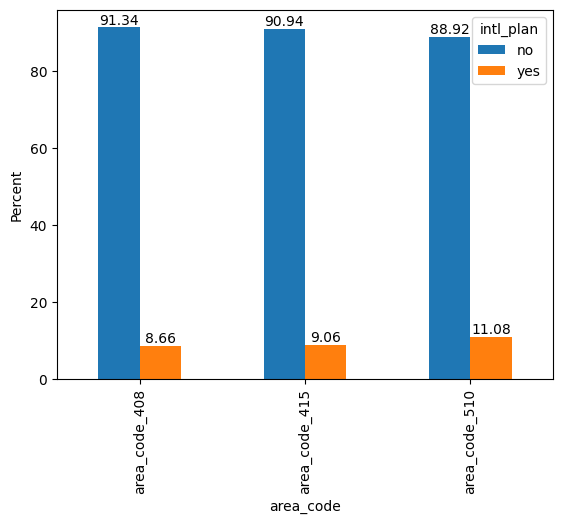

In [30]:
# area code vs intl_plan
ax = crosstab_area_intl.plot.bar()
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Percent")
plt.show()

In [31]:
# area code vs voice_plan
crosstab_area_voice = pd.crosstab(df.area_code, df.voice_plan, normalize='index').round(4)*100
crosstab_area_voice

voice_plan,no,yes
area_code,,
area_code_408,74.34,25.66
area_code_415,72.99,27.01
area_code_510,73.84,26.16


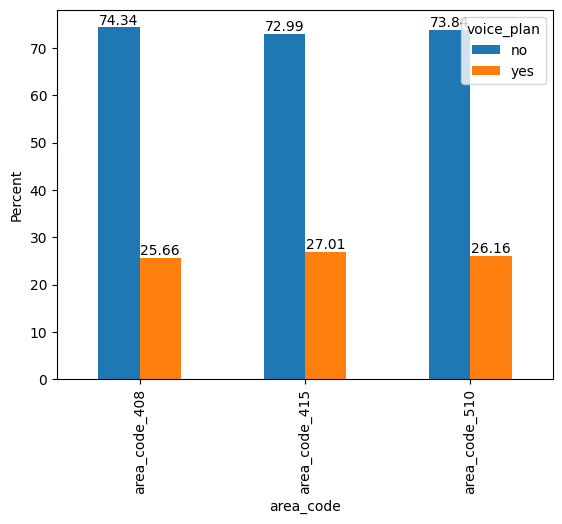

In [32]:
# area code vs voice_plan
ax = crosstab_area_voice.plot.bar()
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Percent")
plt.show()

In [33]:
# Voice plan relationship with churn 
crosstab_voice = pd.crosstab(df.voice_plan, df.churn, normalize='index').round(4)*100
crosstab_voice

churn,no,yes
voice_plan,,
no,83.55,16.45
yes,92.29,7.71


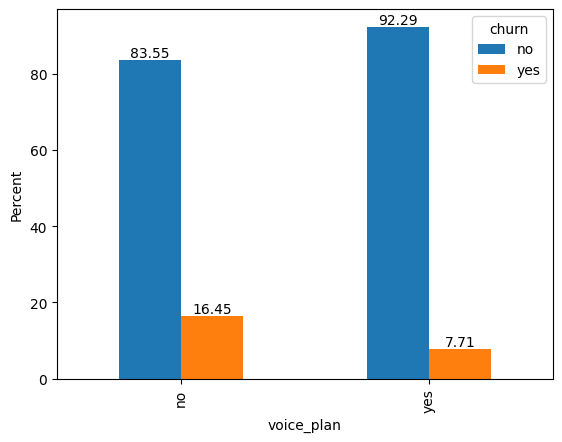

In [34]:
# voice plan vs churn
ax = crosstab_voice.plot.bar()
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Percent")
plt.show()

In [35]:
# International plan relationship with churn 
crosstab_intl = pd.crosstab(df.intl_plan, df.churn, normalize='index').round(4)*100
crosstab_intl

churn,no,yes
intl_plan,,
no,88.78,11.22
yes,57.93,42.07


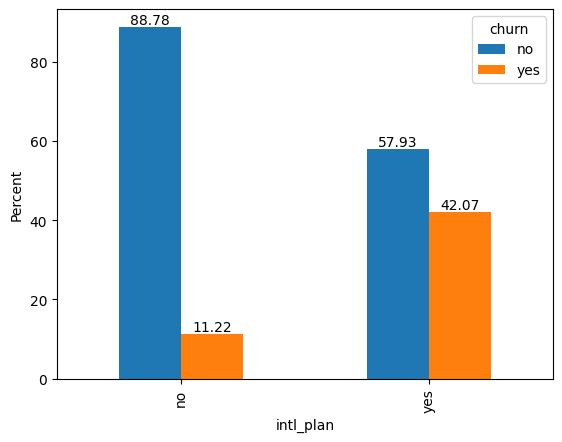

In [36]:
# Intl plan vs churn
ax = crosstab_intl.plot.bar()
for container in ax.containers:
    ax.bar_label(container)
plt.ylabel("Percent")
plt.show()

<AxesSubplot: xlabel='account_length'>

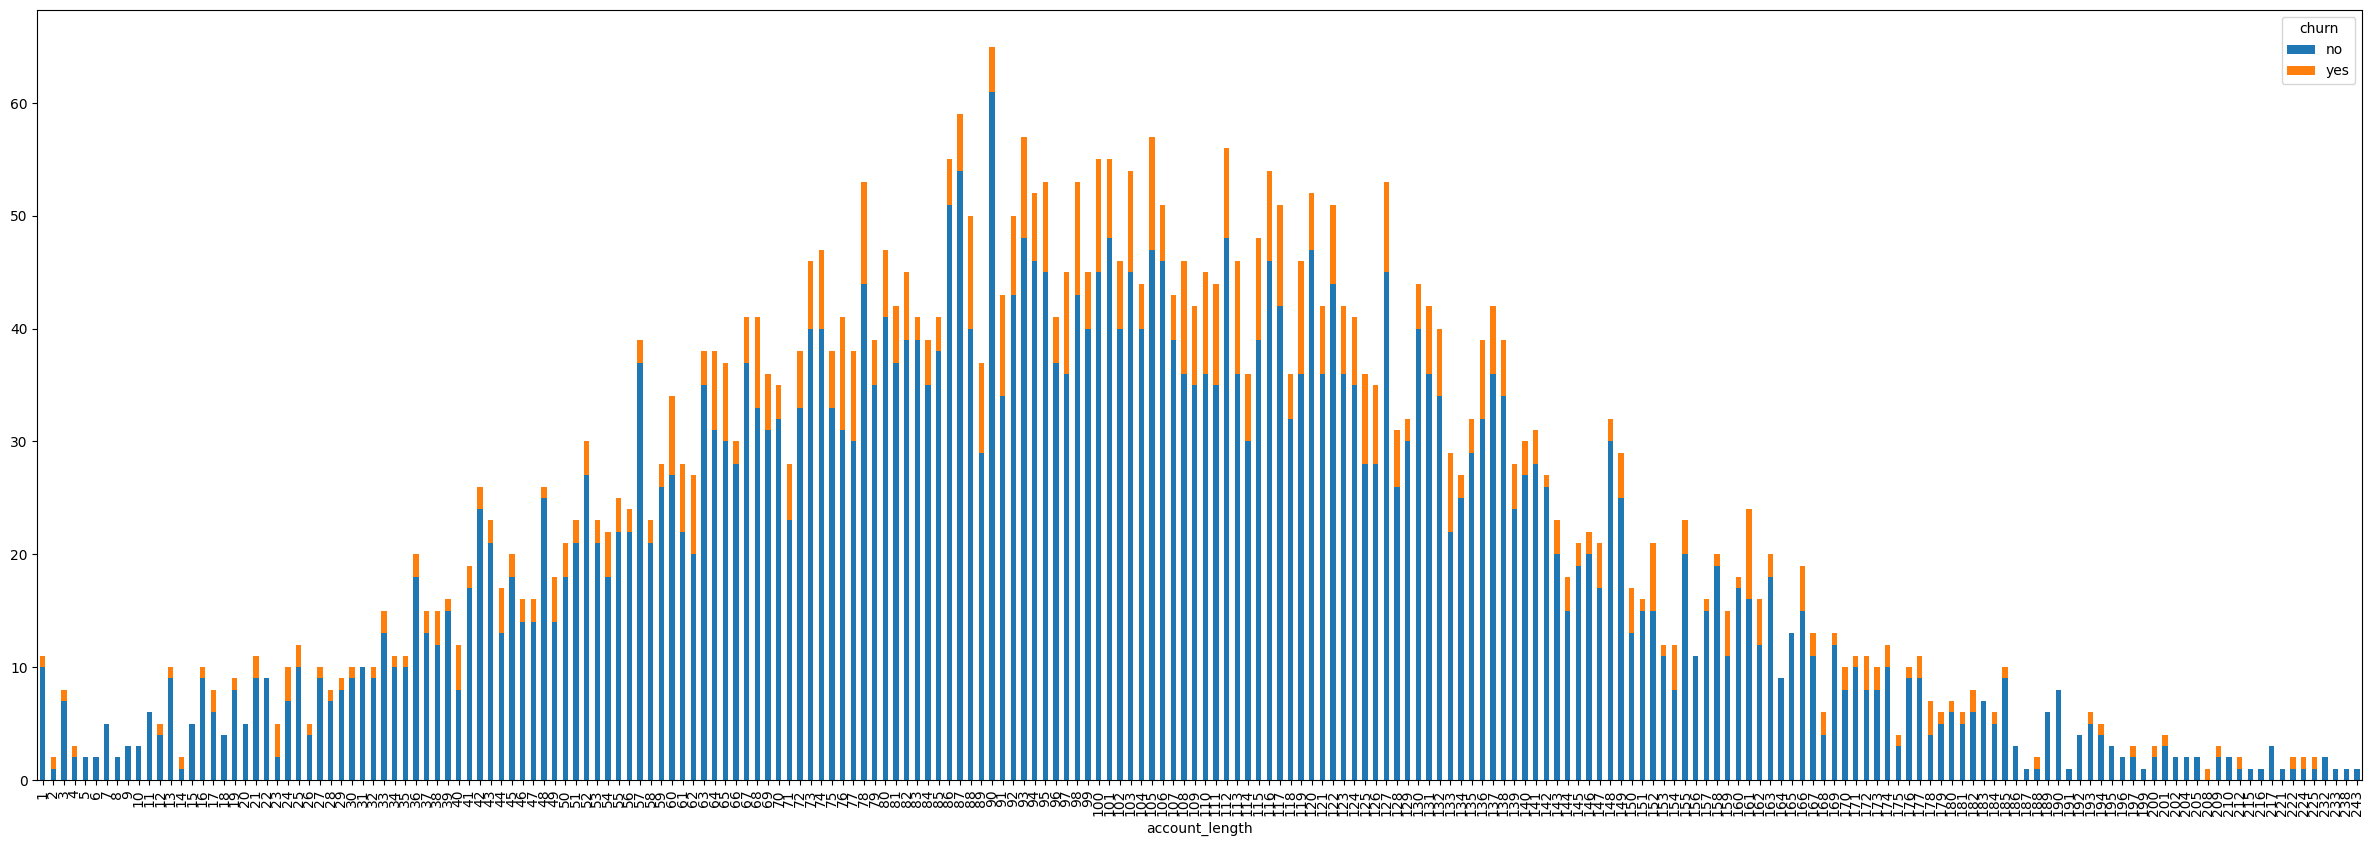

In [37]:
# Account length & churn relationship
df.groupby(["account_length", "churn"]).size().unstack().plot(kind='bar', stacked=True, figsize=(30,10))

<AxesSubplot: xlabel='customer_calls', ylabel='count'>

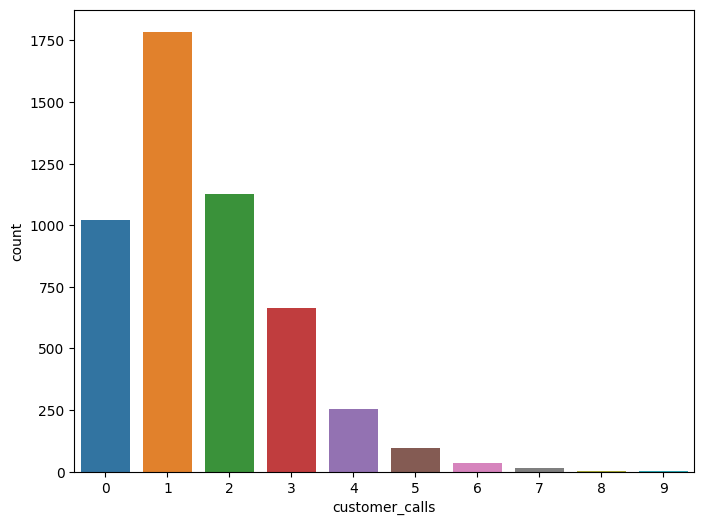

In [38]:
# Customer calls
plt.subplots(figsize=(8,6))
sns.countplot(x=df['customer_calls'])

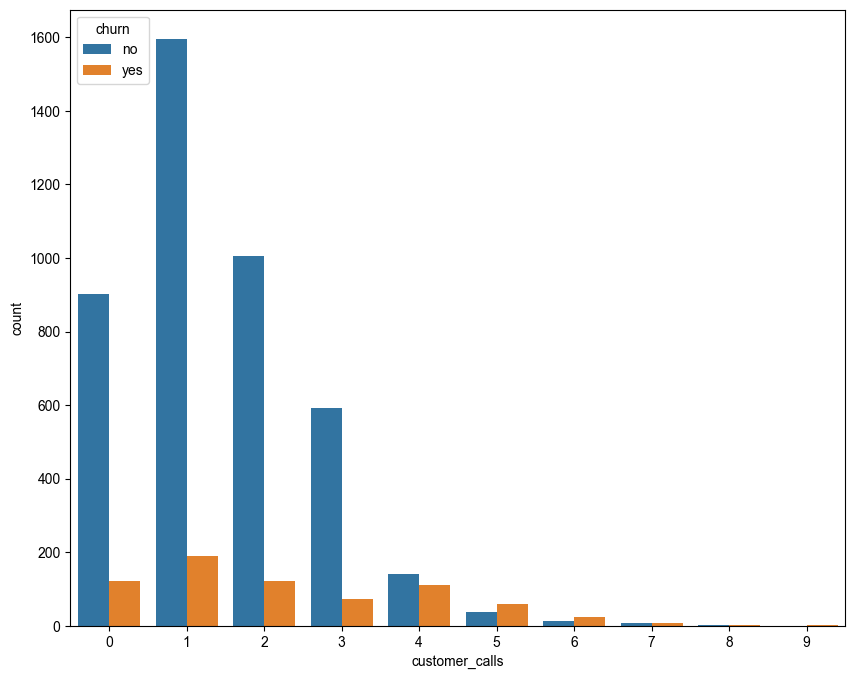

In [39]:
# customer calls relationship with churn
plt.figure(figsize=(10,8))
ax = sns.countplot(x="customer_calls",hue="churn",data=df)
sns.set(style="darkgrid")
plt.show()

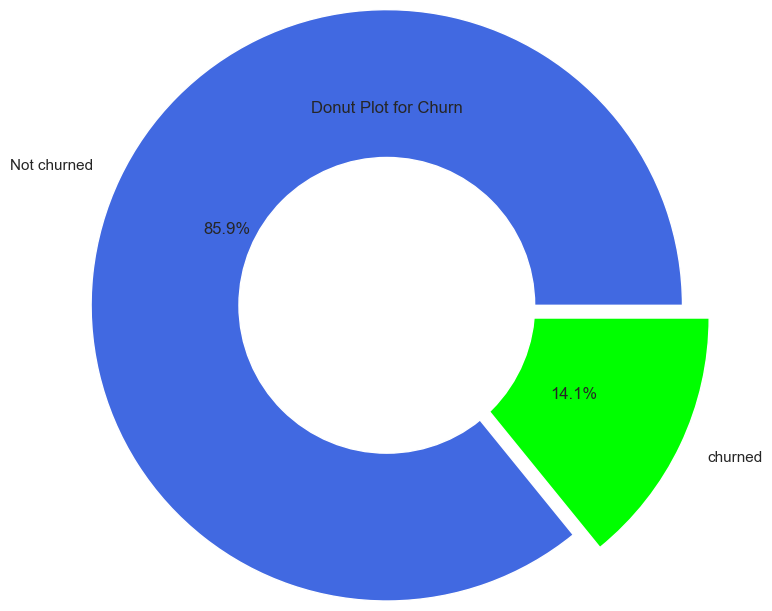

In [40]:
# churn
df1 = df['churn'].value_counts()
explode = (0, 0.2)
plt.pie(df1, explode = explode,autopct='%1.1f%%',radius = 2.0, labels = ['Not churned','churned'],colors=['royalblue' ,'lime'])
circle = plt.Circle( (0,0), 1, color='white')
p=plt.gcf()
p.gca().add_artist(circle)
plt.title('Donut Plot for Churn')
plt.show()

In [41]:
# Feature engineering
# Using EDA most significant features are selected for the model building
# Categorical: state [0], voice_plan[3], intl_plan[5], churn[19] 
# numerical: voice_messages[4], intl_charge[8],
# day_charge[11], eve_charge[14], night_charge[17], customer_calls[18]

In [42]:
# Encoding categorical variables
LE = LabelEncoder()
df.iloc[:, 0] = LE.fit_transform(df.iloc[:, 0])
df.iloc[:, 3] = LE.fit_transform(df.iloc[:, 3])
df.iloc[:, 5] = LE.fit_transform(df.iloc[:, 5])
df.iloc[:, 19] = LE.fit_transform(df.iloc[:, 19])

In [43]:
# Scaling numerical variables
idx_num = [4,8,11,14,17,18]
MM = MinMaxScaler()
df[df.columns[idx_num]] = MM.fit_transform(df[df.columns[idx_num]])

In [44]:
df.head()

,state,area_code,account_length,voice_plan,voice_messages,intl_plan,intl_mins,intl_calls,intl_charge,day_mins,day_calls,day_charge,eve_mins,eve_calls,eve_charge,night_mins,night_calls,night_charge,customer_calls,churn
0,16,area_code_415,128,1,0.480769,0,10.0,3,0.500000,265.1,110,0.754183,197.4,99,0.542866,244.7,91,0.619584,0.111111,0
1,35,area_code_415,107,1,0.500000,0,13.7,3,0.685185,161.6,123,0.459672,195.5,103,0.537690,254.4,103,0.644344,0.111111,0
2,31,area_code_415,137,0,0.000000,0,12.2,5,0.609259,243.4,114,0.692436,121.2,110,0.333225,162.6,104,0.411930,0.000000,0
3,35,area_code_408,84,0,0.000000,1,6.6,7,0.329630,299.4,71,0.851740,61.9,88,0.170171,196.9,89,0.498593,0.222222,0
4,36,area_code_415,75,0,0.000000,1,10.1,3,0.505556,166.7,113,0.474230,148.3,122,0.407959,186.9,121,0.473270,0.333333,0


<function matplotlib.pyplot.show(close=None, block=None)>

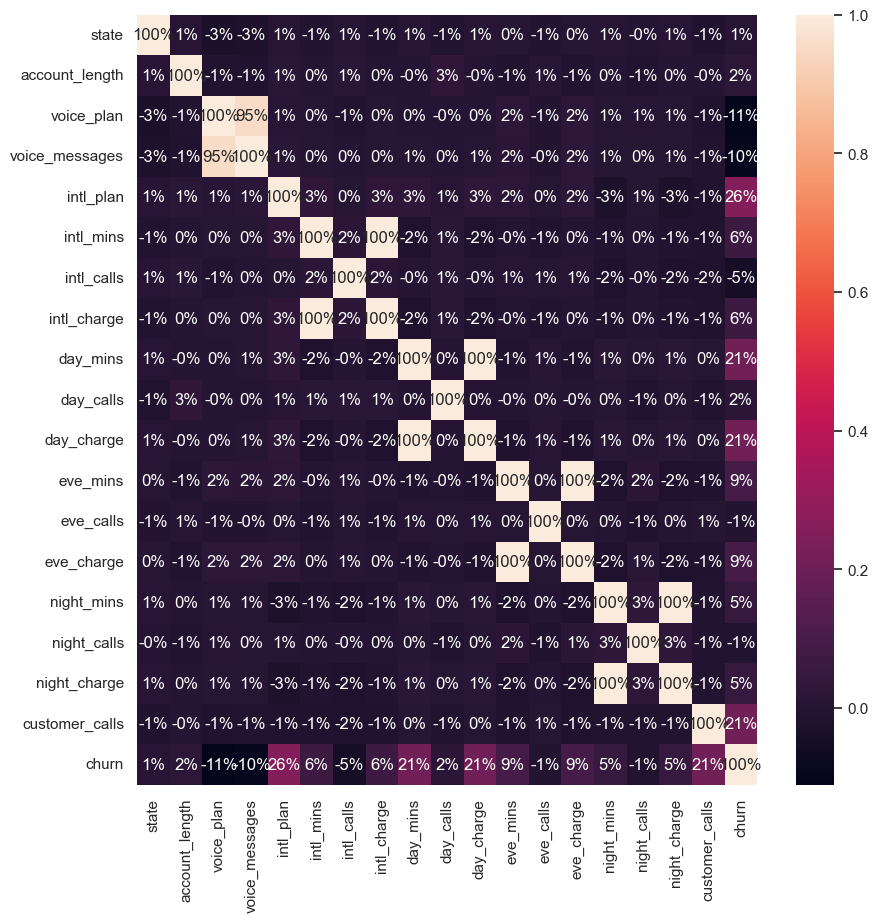

In [45]:
plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True, fmt='0.0%')
plt.show

In [46]:
# Balancing the dataset
# churn variable class count
class_count_0, class_count_1 = df['churn'].value_counts()

# Separate class
class_0 = df[df['churn'] == 0]
class_1 = df[df['churn'] == 1]
# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (4293, 20)
class 1: (707, 20)


total class of 1 and 0: 1    4293
0    4293
Name: churn, dtype: int64


<AxesSubplot: title={'center': 'count (target)'}>

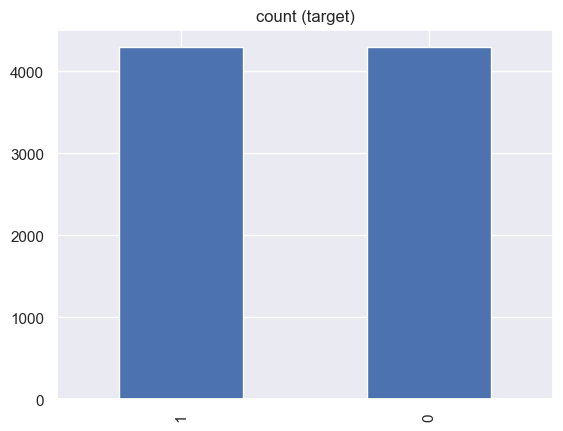

In [47]:
# Balancing the dataset: Random over sampling method
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:",test_over['churn'].value_counts())# plot the count after under-sampling
test_over['churn'].value_counts().plot(kind='bar', title='count (target)')

In [48]:
test_over.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8586 entries, 4953 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   state           8586 non-null   int32  
 1   area_code       8586 non-null   object 
 2   account_length  8586 non-null   int64  
 3   voice_plan      8586 non-null   int32  
 4   voice_messages  8586 non-null   float64
 5   intl_plan       8586 non-null   int32  
 6   intl_mins       8586 non-null   float64
 7   intl_calls      8586 non-null   int64  
 8   intl_charge     8586 non-null   float64
 9   day_mins        8586 non-null   float64
 10  day_calls       8586 non-null   int64  
 11  day_charge      8586 non-null   float64
 12  eve_mins        8586 non-null   float64
 13  eve_calls       8586 non-null   int64  
 14  eve_charge      8586 non-null   float64
 15  night_mins      8586 non-null   float64
 16  night_calls     8586 non-null   int64  
 17  night_charge    8586 non-null 

In [49]:
# Assigning X, Y 

X = test_over.iloc[:, [0,3,4,5,8,11,14,17,18]]
y = test_over.iloc[:, [-1]]

In [50]:
# X, y splitting into train, test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [51]:
# train portion value counts of churn in percent
y_train.value_counts(normalize=True).mul(100).round(2)

churn
0        50.1
1        49.9
dtype: float64

In [52]:
# test portion value counts of churn in percent
y_test.value_counts(normalize=True).mul(100).round(2)

churn
1        50.23
0        49.77
dtype: float64

In [53]:
# Selection of models

models =[]
models.append(('LogisticRegression', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(("Naive Bayes", MultinomialNB()))
models.append(('SVM', SVC()))
models.append(('Decision Tree Classifier', DecisionTreeClassifier()))
models.append(('Random Forest Classifier', RandomForestClassifier()))
models.append(('Bagging Classifier', BaggingClassifier()))
models.append(('Ada Boost Classifier', AdaBoostClassifier()))
models.append(('XG Boost Classifier', XGBClassifier()))

for title, modelname in models:
    modelname.fit(X_train, y_train)
    
    y_pred_test = modelname.predict(X_test)
    predictions = [round(value) for value in y_pred_test]
    
    accuracy = accuracy_score(y_test, predictions)
    print(title, 'Accuracy: %.2f%%' % (accuracy * 100.0))

LogisticRegression Accuracy: 77.87%
KNN Accuracy: 87.31%
Naive Bayes Accuracy: 65.57%
SVM Accuracy: 65.26%
Decision Tree Classifier Accuracy: 95.11%
Random Forest Classifier Accuracy: 97.98%
Bagging Classifier Accuracy: 97.67%
Ada Boost Classifier Accuracy: 84.08%
XG Boost Classifier Accuracy: 97.90%


In [54]:
# Logistic regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_train = logreg.predict(X_train)
y_pred_test = logreg.predict(X_test)

ac1 = accuracy_score(y_train, y_pred_train)
ac2 = accuracy_score(y_test, y_pred_test)
print("Training score:", ac1.round(3)*100)
print("Test score:", ac2.round(3)*100)
print('logreg coeff:', logreg.coef_)

Training score: 78.10000000000001
Test score: 77.9
logreg coeff: [[ 4.61775696e-03 -1.35894185e+00  7.49194901e-01  2.38741475e+00
   1.18420248e+00  4.47342575e+00  2.36001592e+00  1.57645355e+00
   5.15258584e+00]]


In [55]:
# Model evalation: K-fold method
kfold = KFold(n_splits=5)

results = abs(cross_val_score(logreg, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error'))
print('neg_mean_squared_error:', np.mean(np.sqrt(results).round(3)))

results = abs(cross_val_score(logreg, X_train, y_train, cv=kfold,scoring='accuracy'))
print('accuracy %:',np.mean(results).round(3)*100)

neg_mean_squared_error: 0.4692
accuracy %: 78.0


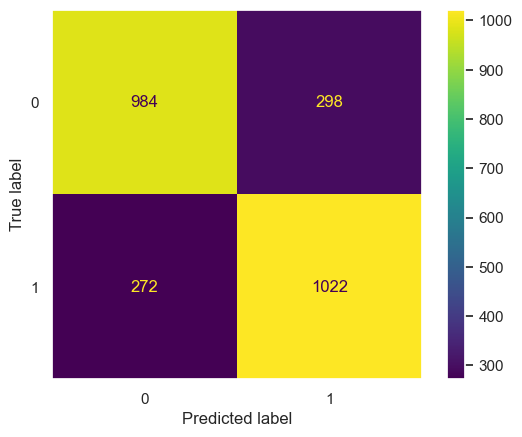

In [56]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=logreg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [57]:
# Classification metrics
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.77      0.78      1282
           1       0.77      0.79      0.78      1294

    accuracy                           0.78      2576
   macro avg       0.78      0.78      0.78      2576
weighted avg       0.78      0.78      0.78      2576



In [58]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0] 

classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

classification_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification error: {0:0.4f}'.format(classification_error))

precision = TP/float(TP+FP)
print('Precision: {0:0.4f}'.format(precision))

recall = TP / float(TP+FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP+FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP+TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN+FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy: 0.7787
Classification error: 0.2213
Precision: 0.7742
Recall or Sensitivity : 0.7898
True Positive Rate : 0.7898
False Positive Rate : 0.2324
Specificity : 0.7676


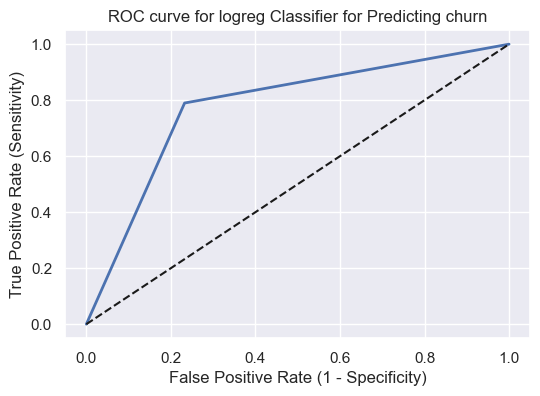

In [59]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for logreg Classifier for Predicting churn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [60]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.7787


In [61]:
# KNN Classifier

# To find optimum n_neighbors
train_accuracy = []
test_accuracy = []

for i in range (3,20,2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred_train = knn.predict(X_train)
    y_pred_test = knn.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_pred_train).round(2))
    test_accuracy.append(accuracy_score(y_test, y_pred_test).round(2))

d1 = pd.DataFrame(range (3,20,2))
d2 = pd.DataFrame(train_accuracy)
d3 = pd.DataFrame(test_accuracy)

pd.concat([d1,d2,d3], axis=1)

,0,0,0
0,3,0.95,0.90
1,5,0.92,0.87
2,7,0.89,0.85
3,9,0.87,0.84
4,11,0.85,0.83
5,13,0.85,0.83
6,15,0.84,0.81
7,17,0.83,0.80
8,19,0.82,0.78


In [62]:
# KNN classification
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

y_pred_train = knn.predict(X_train)
y_pred_test = knn.predict(X_test)

# Metrics
ac1 = accuracy_score(y_train, y_pred_train)
ac2 = accuracy_score(y_test, y_pred_test)
print("Training score:", ac1.round(3)*100)
print("Test score:", ac2.round(3)*100)

Training score: 95.5
Test score: 90.4


In [63]:
# Model evalation: K-fold method
kfold = KFold(n_splits=5)

results = abs(cross_val_score(knn, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error'))
print('neg_mean_squared_error:', np.mean(np.sqrt(results).round(3)))

results = abs(cross_val_score(knn, X_train, y_train, cv=kfold,scoring='accuracy'))
print('accuracy:',np.mean(results).round(3)*100)

neg_mean_squared_error: 0.337
accuracy: 88.6


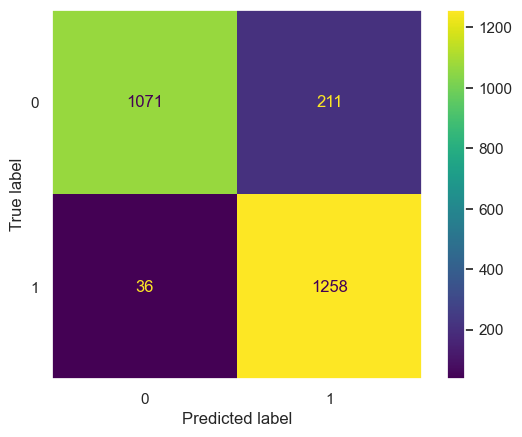

In [64]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [65]:
# Classification metrics
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90      1282
           1       0.86      0.97      0.91      1294

    accuracy                           0.90      2576
   macro avg       0.91      0.90      0.90      2576
weighted avg       0.91      0.90      0.90      2576



In [66]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0] 

classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

classification_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification error: {0:0.4f}'.format(classification_error))

precision = TP/float(TP+FP)
print('Precision: {0:0.4f}'.format(precision))

recall = TP / float(TP+FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP+FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP+TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN+FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy: 0.9041
Classification error: 0.0959
Precision: 0.8564
Recall or Sensitivity : 0.9722
True Positive Rate : 0.9722
False Positive Rate : 0.1646
Specificity : 0.8354


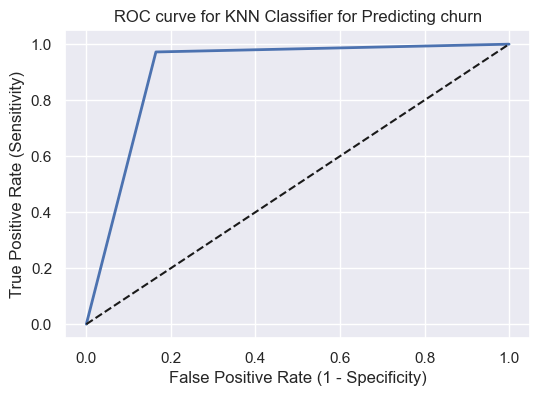

In [67]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for KNN Classifier for Predicting churn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [68]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9038


In [69]:
# Naive Bayes classification
MNB = MultinomialNB()
MNB.fit(X_train, y_train)

y_pred_train = MNB.predict(X_train)
y_pred_test = MNB.predict(X_test)

# Metrics
ac1 = accuracy_score(y_train, y_pred_train)
ac2 = accuracy_score(y_test, y_pred_test)
print("Training score:", ac1.round(3)*100)
print("Test score:", ac2.round(3)*100)

Training score: 64.1
Test score: 65.60000000000001


In [70]:
# Model evalation: K-fold method
kfold = KFold(n_splits=5)

results = abs(cross_val_score(MNB, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error'))
print('neg_mean_squared_error:', np.mean(np.sqrt(results).round(3)))

results = abs(cross_val_score(MNB, X_train, y_train, cv=kfold,scoring='accuracy'))
print('accuracy:',np.mean(results).round(3)*100)

neg_mean_squared_error: 0.6092
accuracy: 62.9


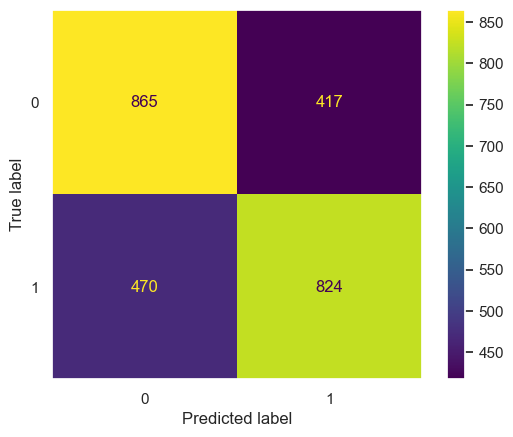

In [71]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=MNB.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [72]:
# Classification metrics
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.65      0.67      0.66      1282
           1       0.66      0.64      0.65      1294

    accuracy                           0.66      2576
   macro avg       0.66      0.66      0.66      2576
weighted avg       0.66      0.66      0.66      2576



In [73]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0] 

classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

classification_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification error: {0:0.4f}'.format(classification_error))

precision = TP/float(TP+FP)
print('Precision: {0:0.4f}'.format(precision))

recall = TP / float(TP+FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP+FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP+TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN+FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy: 0.6557
Classification error: 0.3443
Precision: 0.6640
Recall or Sensitivity : 0.6368
True Positive Rate : 0.6368
False Positive Rate : 0.3253
Specificity : 0.6747


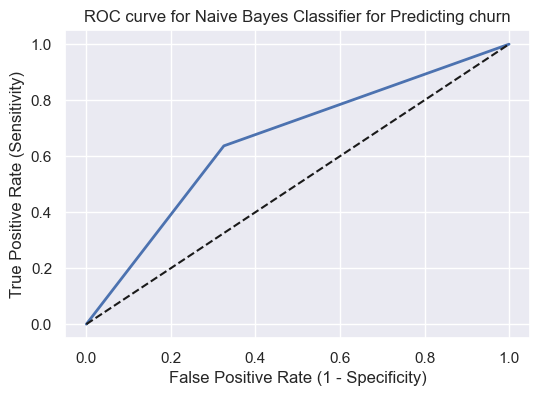

In [74]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Naive Bayes Classifier for Predicting churn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [75]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.6558


In [76]:
# Support Vector Machine Classifier
# SVM, default is rbf
svc = SVC(gamma=10)
svc.fit(X_train, y_train)
y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_pred_train).round(3)*100)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test).round(3)*100)

Training Accuracy: 97.2
Test Accuracy: 93.60000000000001


In [77]:
# Model evalation: K-Fold METHOD
kfold = KFold(n_splits=5)

results = abs(cross_val_score(svc, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error'))
print('neg_mean_squared_error:', np.mean(np.sqrt(results).round(3)))

results = abs(cross_val_score(svc, X_train, y_train, cv=kfold,scoring='accuracy'))
print('accuracy %:',np.mean(results).round(3)*100)

neg_mean_squared_error: 0.275
accuracy %: 92.4


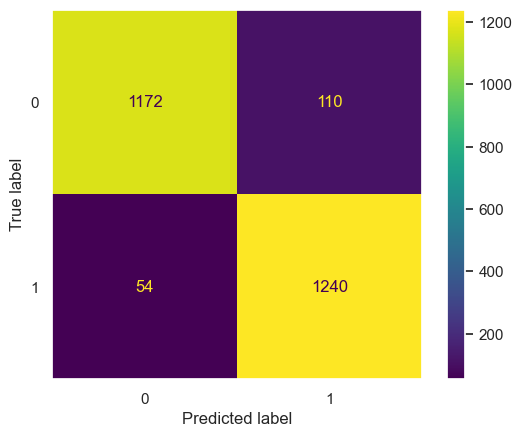

In [78]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=svc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [79]:
# Classification metrics
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1282
           1       0.92      0.96      0.94      1294

    accuracy                           0.94      2576
   macro avg       0.94      0.94      0.94      2576
weighted avg       0.94      0.94      0.94      2576



In [80]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0] 

classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

classification_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification error: {0:0.4f}'.format(classification_error))

precision = TP/float(TP+FP)
print('Precision: {0:0.4f}'.format(precision))

recall = TP / float(TP+FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP+FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP+TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN+FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy: 0.9363
Classification error: 0.0637
Precision: 0.9185
Recall or Sensitivity : 0.9583
True Positive Rate : 0.9583
False Positive Rate : 0.0858
Specificity : 0.9142


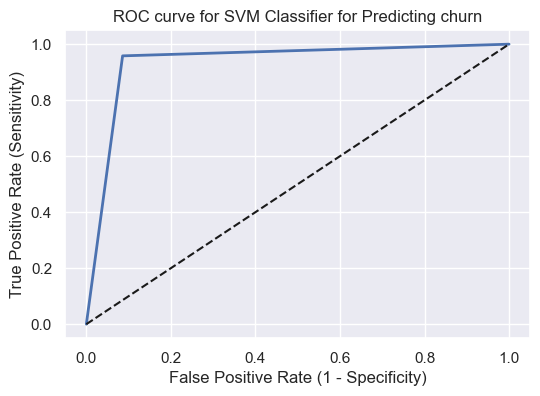

In [81]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for SVM Classifier for Predicting churn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [82]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9362


In [83]:
# Decision Tree Classifier
# To find optimum max_depth criterion = entropy
train_accuracy = []
test_accuracy = []

for i in range (3,12,2):
    DT = DecisionTreeClassifier(criterion = 'entropy', max_depth=i)
    DT.fit(X_train, y_train)
    y_pred_train = DT.predict(X_train)
    y_pred_test = DT.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_pred_train).round(2))
    test_accuracy.append(accuracy_score(y_test, y_pred_test).round(2))

d1 = pd.DataFrame(range (3,12,2))
d2 = pd.DataFrame(train_accuracy)
d3 = pd.DataFrame(test_accuracy)

pd.concat([d1,d2,d3], axis=1)

,0,0,0
0,3,0.83,0.83
1,5,0.87,0.87
2,7,0.90,0.90
3,9,0.92,0.91
4,11,0.94,0.92


In [84]:
# To find optimum max_depth, criterion = gini
train_accuracy = []
test_accuracy = []

for i in range (3,12,2):
    DT = DecisionTreeClassifier(criterion = 'gini', max_depth=i)
    DT.fit(X_train, y_train)
    y_pred_train = DT.predict(X_train)
    y_pred_test = DT.predict(X_test)
    train_accuracy.append(accuracy_score(y_train, y_pred_train).round(2))
    test_accuracy.append(accuracy_score(y_test, y_pred_test).round(2))

d1 = pd.DataFrame(range (3,12,2))
d2 = pd.DataFrame(train_accuracy)
d3 = pd.DataFrame(test_accuracy)

pd.concat([d1,d2,d3], axis=1)

,0,0,0
0,3,0.84,0.83
1,5,0.88,0.88
2,7,0.90,0.90
3,9,0.92,0.91
4,11,0.94,0.91


In [85]:
# Decision tree model fitting (entropy method)
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=11)
model.fit(X_train, y_train)
print("Node counts:", model.tree_.node_count)
print("max depth:", model.tree_.max_depth)

Node counts: 309
max depth: 11


In [86]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train).round(3)*100)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test).round(3)*100)

Training Accuracy: 94.19999999999999
Test Accuracy: 91.7


In [87]:
# Model evalation: K-Fold METHOD
kfold = KFold(n_splits=5)

results = abs(cross_val_score(model, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error'))
print('neg_mean_squared_error:', np.mean(np.sqrt(results).round(3)))

results = abs(cross_val_score(model, X_train, y_train, cv=kfold,scoring='accuracy'))
print('accuracy %:',np.mean(results).round(3)*100)

neg_mean_squared_error: 0.29979999999999996
accuracy %: 90.9


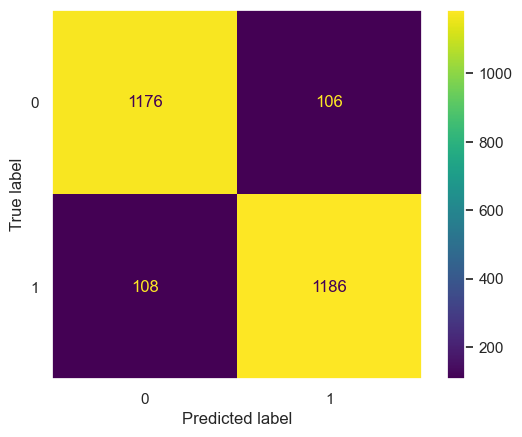

In [88]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [89]:
# Classification metrics
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      1282
           1       0.92      0.92      0.92      1294

    accuracy                           0.92      2576
   macro avg       0.92      0.92      0.92      2576
weighted avg       0.92      0.92      0.92      2576



In [90]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0] 

classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

classification_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification error: {0:0.4f}'.format(classification_error))

precision = TP/float(TP+FP)
print('Precision: {0:0.4f}'.format(precision))

recall = TP / float(TP+FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP+FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP+TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN+FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy: 0.9169
Classification error: 0.0831
Precision: 0.9180
Recall or Sensitivity : 0.9165
True Positive Rate : 0.9165
False Positive Rate : 0.0827
Specificity : 0.9173


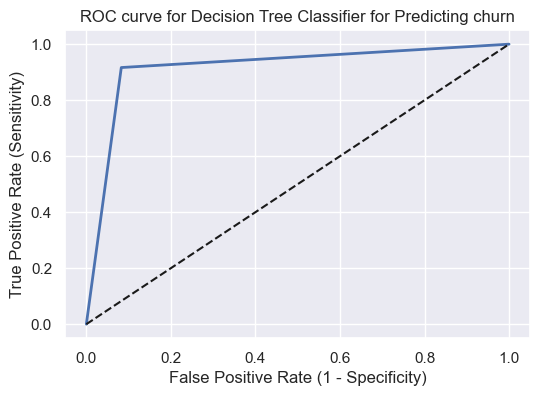

In [91]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision Tree Classifier for Predicting churn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [92]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9169


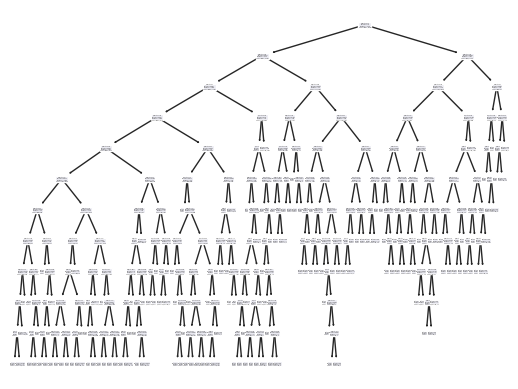

In [93]:
# Decision tree plots
tree.plot_tree(model);

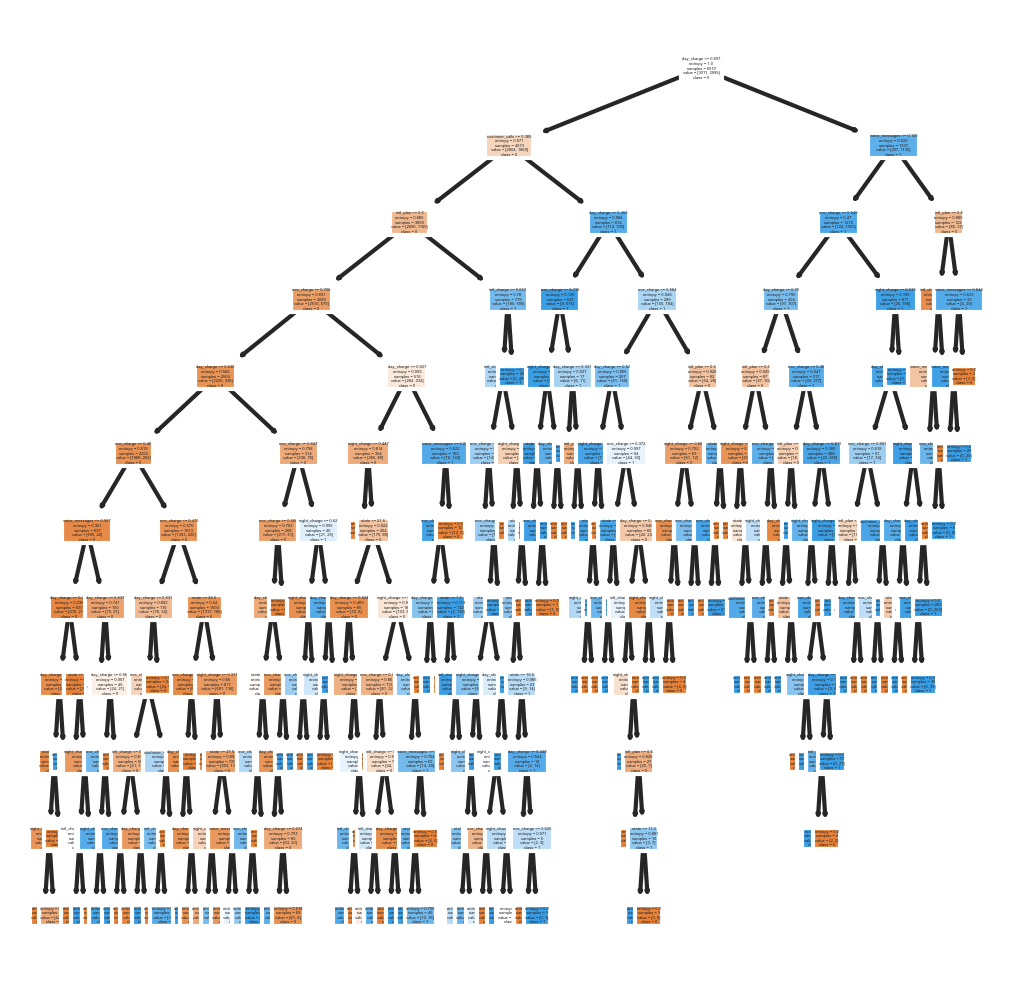

In [94]:
fn=['state','voice_plan','voice_messages','intl_plan','intl_charge','day_charge', 
    'eve_charge', 'night_charge', 'customer_calls', 'churn']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [95]:
# Decision tree model fitting (gini method)
model_gini = DecisionTreeClassifier(criterion = 'gini', max_depth=11)
model_gini.fit(X_train, y_train)
print("Node counts:", model_gini.tree_.node_count)
print("max depth:", model_gini.tree_.max_depth)

Node counts: 339
max depth: 11


In [96]:
y_pred_train = model_gini.predict(X_train)
y_pred_test = model_gini.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train).round(3)*100)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test).round(3)*100)

Training Accuracy: 94.39999999999999
Test Accuracy: 91.2


In [97]:
# Model evalation: K-Fold METHOD
kfold = KFold(n_splits=5)

results = abs(cross_val_score(model_gini, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error'))
print('neg_mean_squared_error:', np.mean(np.sqrt(results).round(3)))

results = abs(cross_val_score(model_gini, X_train, y_train, cv=kfold,scoring='accuracy'))
print('accuracy %:',np.mean(results).round(3)*100)

neg_mean_squared_error: 0.30060000000000003
accuracy %: 90.9


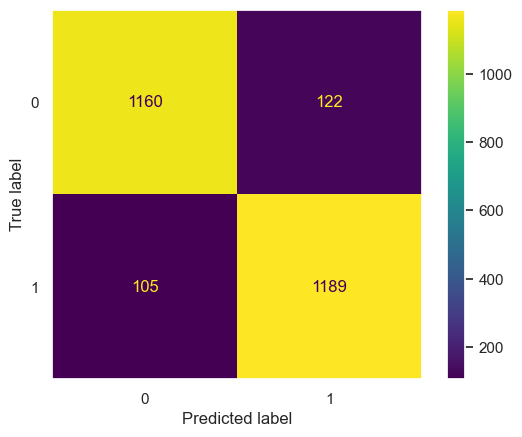

In [98]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=model_gini.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [99]:
# Classification metrics
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91      1282
           1       0.91      0.92      0.91      1294

    accuracy                           0.91      2576
   macro avg       0.91      0.91      0.91      2576
weighted avg       0.91      0.91      0.91      2576



In [100]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0] 

classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

classification_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification error: {0:0.4f}'.format(classification_error))

precision = TP/float(TP+FP)
print('Precision: {0:0.4f}'.format(precision))

recall = TP / float(TP+FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP+FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP+TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN+FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy: 0.9119
Classification error: 0.0881
Precision: 0.9069
Recall or Sensitivity : 0.9189
True Positive Rate : 0.9189
False Positive Rate : 0.0952
Specificity : 0.9048


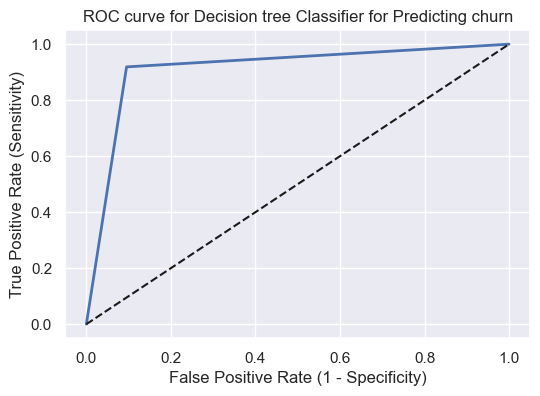

In [101]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Decision tree Classifier for Predicting churn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [102]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9118


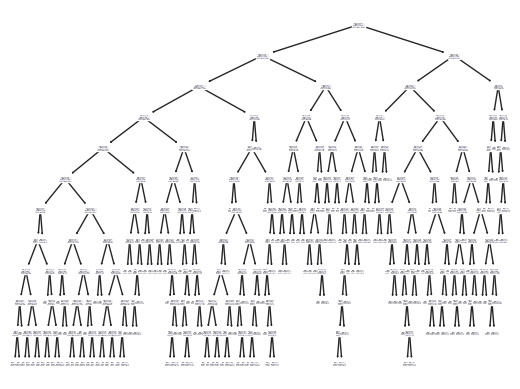

In [103]:
# Decision tree plots
tree.plot_tree(model_gini);

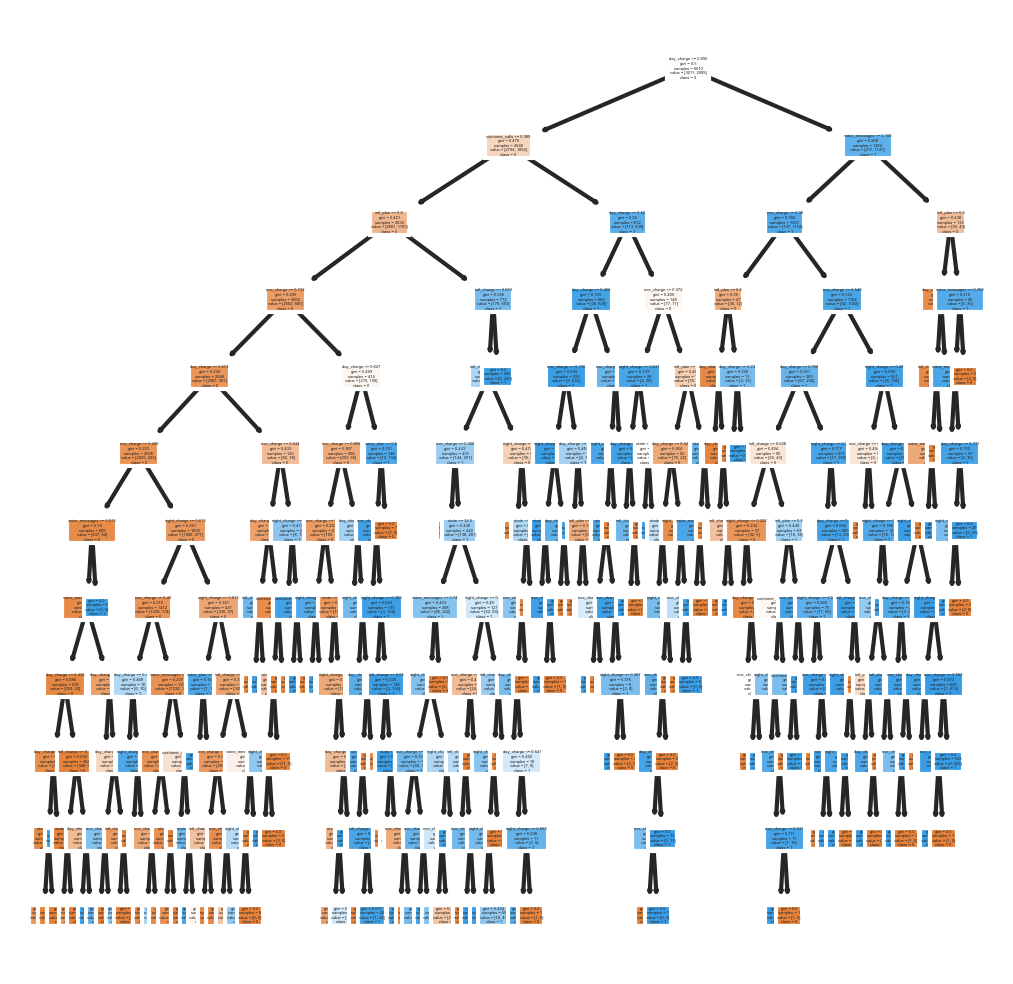

In [104]:
fn=['state','voice_plan','voice_messages','intl_plan','intl_charge','day_charge', 
    'eve_charge', 'night_charge', 'customer_calls', 'churn']
cn=['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_gini,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [105]:
# Random Forest Classifier 
RFC = RandomForestClassifier(n_estimators=100, max_depth=11, max_features=0.9,
                            max_samples=0.8, random_state=42)
RFC.fit(X_train, y_train)

y_pred_train = RFC.predict(X_train)
y_pred_test = RFC.predict(X_test)
print("Training Accuracy:", accuracy_score(y_train, y_pred_train).round(3)*100)
print("Test Accuracy:", accuracy_score(y_test, y_pred_test).round(3)*100)

Training Accuracy: 96.1
Test Accuracy: 94.0


In [106]:
# Model evalation: K-Fold METHOD
kfold = KFold(n_splits=5)

results = abs(cross_val_score(RFC, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error'))
print('neg_mean_squared_error:', np.mean(np.sqrt(results).round(3)))

results = abs(cross_val_score(RFC, X_train, y_train, cv=kfold,scoring='accuracy'))
print('accuracy %:',np.mean(results).round(3)*100)

neg_mean_squared_error: 0.26959999999999995
accuracy %: 92.7


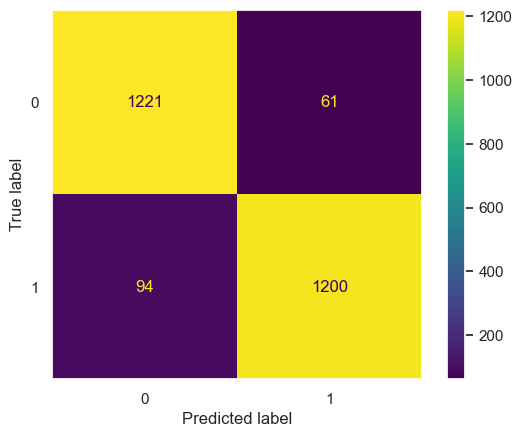

In [107]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=RFC.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [108]:
# Classification metrics
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1282
           1       0.95      0.93      0.94      1294

    accuracy                           0.94      2576
   macro avg       0.94      0.94      0.94      2576
weighted avg       0.94      0.94      0.94      2576



In [109]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0] 

classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

classification_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification error: {0:0.4f}'.format(classification_error))

precision = TP/float(TP+FP)
print('Precision: {0:0.4f}'.format(precision))

recall = TP / float(TP+FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP+FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP+TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN+FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy: 0.9398
Classification error: 0.0602
Precision: 0.9516
Recall or Sensitivity : 0.9274
True Positive Rate : 0.9274
False Positive Rate : 0.0476
Specificity : 0.9524


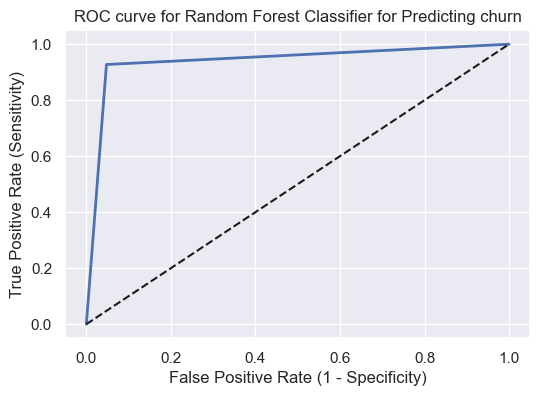

In [110]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Random Forest Classifier for Predicting churn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [111]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9399


In [112]:
# Bagging Classifier
bag = BaggingClassifier(base_estimator=RandomForestClassifier(max_depth=11),
                        n_estimators=100, max_features=0.9, 
                        max_samples=0.8, random_state=42)
                 
bag.fit(X_train, y_train)

y_pred_train = bag.predict(X_train)
y_pred_test = bag.predict(X_test)

# Metrics
ac1_bag = accuracy_score(y_train, y_pred_train)
ac2_bag = accuracy_score(y_test, y_pred_test)
print("Training accuracy:", ac1_bag.round(3)*100)
print("Test accuracy:", ac2_bag.round(3)*100)

Training accuracy: 95.89999999999999
Test accuracy: 93.2


In [113]:
# Model evalation: K-Fold METHOD
kfold = KFold(n_splits=5)

results = abs(cross_val_score(bag, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error'))
print('neg_mean_squared_error:', np.mean(np.sqrt(results).round(3)))

results = abs(cross_val_score(bag, X_train, y_train, cv=kfold,scoring='accuracy'))
print('accuracy %:',np.mean(results).round(3)*100)

neg_mean_squared_error: 0.2908
accuracy %: 91.5


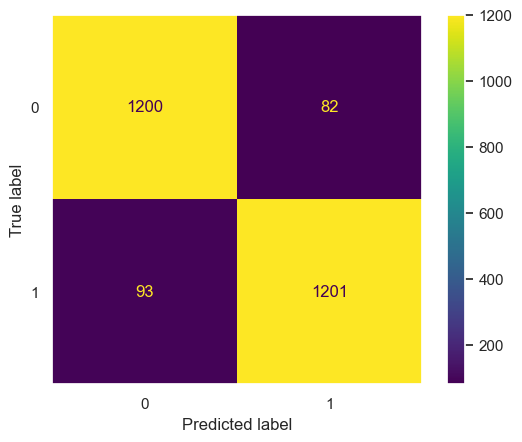

In [114]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=bag.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [115]:
# Classification metrics
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1282
           1       0.94      0.93      0.93      1294

    accuracy                           0.93      2576
   macro avg       0.93      0.93      0.93      2576
weighted avg       0.93      0.93      0.93      2576



In [116]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0] 

classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

classification_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification error: {0:0.4f}'.format(classification_error))

precision = TP/float(TP+FP)
print('Precision: {0:0.4f}'.format(precision))

recall = TP / float(TP+FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP+FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP+TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN+FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy: 0.9321
Classification error: 0.0679
Precision: 0.9361
Recall or Sensitivity : 0.9281
True Positive Rate : 0.9281
False Positive Rate : 0.0640
Specificity : 0.9360


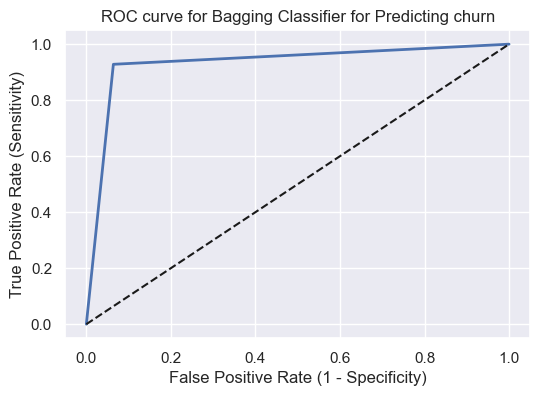

In [117]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for Bagging Classifier for Predicting churn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [118]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9321


In [119]:
# Ada Boost Classifier
abc = AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=11),
                                 n_estimators=100, random_state=42, 
                                 learning_rate=0.1)
                 
abc.fit(X_train, y_train)

y_pred_train = abc.predict(X_train)
y_pred_test = abc.predict(X_test)

# Metrics
ac1_abc = accuracy_score(y_train, y_pred_train)
ac2_abc = accuracy_score(y_test, y_pred_test)
print("Training accuracy:", ac1_abc.round(3)*100)
print("Test accuracy:", ac2_abc.round(3)*100)

Training accuracy: 99.3
Test accuracy: 96.8


In [120]:
# Model evalation: K-Fold METHOD
kfold = KFold(n_splits=5)

results = abs(cross_val_score(bag, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error'))
print('neg_mean_squared_error:', np.mean(np.sqrt(results).round(3)))

results = abs(cross_val_score(bag, X_train, y_train, cv=kfold,scoring='accuracy'))
print('accuracy %:',np.mean(results).round(3)*100)

neg_mean_squared_error: 0.2908
accuracy %: 91.5


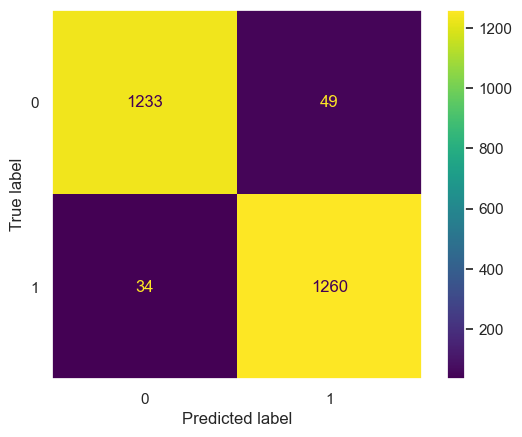

In [121]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=abc.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [122]:
# Classification metrics
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1282
           1       0.96      0.97      0.97      1294

    accuracy                           0.97      2576
   macro avg       0.97      0.97      0.97      2576
weighted avg       0.97      0.97      0.97      2576



In [123]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0] 

classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

classification_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification error: {0:0.4f}'.format(classification_error))

precision = TP/float(TP+FP)
print('Precision: {0:0.4f}'.format(precision))

recall = TP / float(TP+FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP+FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP+TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN+FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy: 0.9678
Classification error: 0.0322
Precision: 0.9626
Recall or Sensitivity : 0.9737
True Positive Rate : 0.9737
False Positive Rate : 0.0382
Specificity : 0.9618


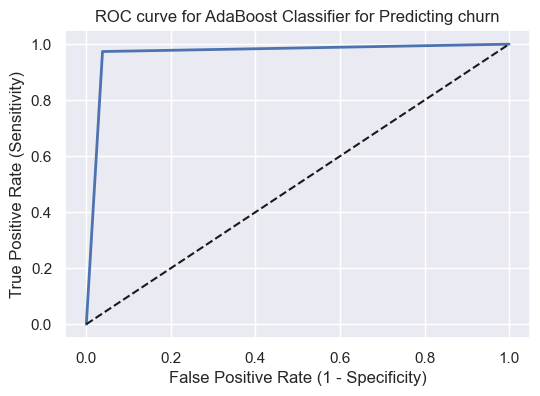

In [124]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for AdaBoost Classifier for Predicting churn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [125]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9678


In [126]:
# XG Boost Classifier

xgb = XGBClassifier(n_estimators = 100, gamma=1, reg_lambda=0.5)
              
xgb.fit(X_train, y_train)

y_pred_train = xgb.predict(X_train)
y_pred_test = xgb.predict(X_test)

# Metrics
ac1_xgb = accuracy_score(y_train, y_pred_train)
ac2_xgb = accuracy_score(y_test, y_pred_test)
print("Training accuracy:", ac1_xgb.round(3)*100)
print("Test accuracy:", ac2_xgb.round(2)*100)

Training accuracy: 99.9
Test accuracy: 98.0


In [127]:
# Model evalation: K-Fold METHOD
kfold = KFold(n_splits=5)

results = abs(cross_val_score(xgb, X_train, y_train, cv=kfold,scoring='neg_mean_squared_error'))
print('neg_mean_squared_error:', np.mean(np.sqrt(results).round(3)))

results = abs(cross_val_score(xgb, X_train, y_train, cv=kfold,scoring='accuracy'))
print('accuracy %:',np.mean(results).round(3)*100)

neg_mean_squared_error: 0.18639999999999998
accuracy %: 96.5


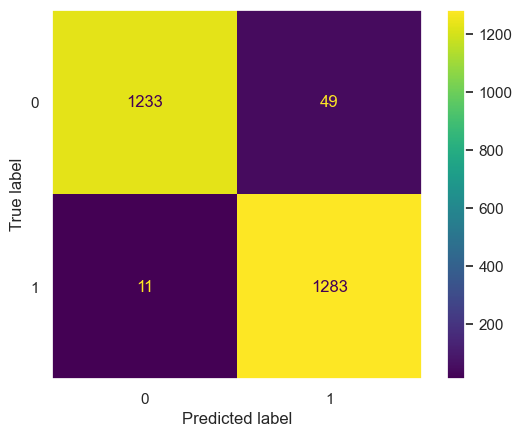

In [128]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred_test, labels=xgb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.grid(False)
plt.show()

In [129]:
# Classification metrics
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.98      1282
           1       0.96      0.99      0.98      1294

    accuracy                           0.98      2576
   macro avg       0.98      0.98      0.98      2576
weighted avg       0.98      0.98      0.98      2576



In [130]:
TN = cm[0,0]
TP = cm[1,1]
FP = cm[0,1]
FN = cm[1,0] 

classification_accuracy = (TP+TN) / float(TP+TN+FP+FN)
print('Classification accuracy: {0:0.4f}'.format(classification_accuracy))

classification_error = (FP+FN) / float(TP+TN+FP+FN)
print('Classification error: {0:0.4f}'.format(classification_error))

precision = TP/float(TP+FP)
print('Precision: {0:0.4f}'.format(precision))

recall = TP / float(TP+FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

true_positive_rate = TP / float(TP+FN)
print('True Positive Rate : {0:0.4f}'.format(true_positive_rate))

false_positive_rate = FP / float(FP+TN)
print('False Positive Rate : {0:0.4f}'.format(false_positive_rate))

specificity = TN / (TN+FP)
print('Specificity : {0:0.4f}'.format(specificity))

Classification accuracy: 0.9767
Classification error: 0.0233
Precision: 0.9632
Recall or Sensitivity : 0.9915
True Positive Rate : 0.9915
False Positive Rate : 0.0382
Specificity : 0.9618


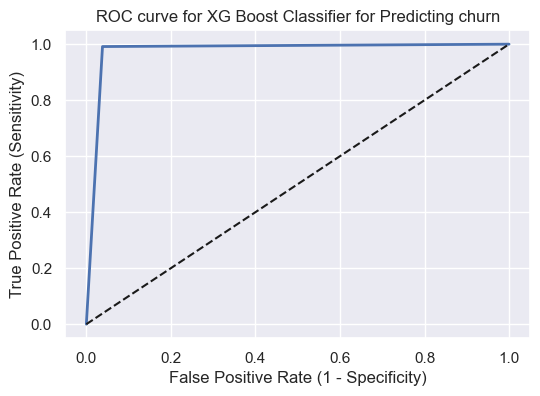

In [131]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_test)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for XG Boost Classifier for Predicting churn')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()

In [132]:
ROC_AUC = roc_auc_score(y_test, y_pred_test)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.9766
